### **Date:** 16 - March - 2023 6:30 - 8:30 PM Meeting Presentation. 

## EDA 

| Milestone                                  | Duration                                     | Task start - End Date   | Done |
| ------------------------------------------ | -------------------------------------------  | ----------------------- | ---- |
| Kick off and Business Objective discussion | 1 day                                        | 08-03-2023              |      | 
| Data set Details                           | 1 Week – 1 ½ week                            | 09-03-2023              |      | 
| <span style="color:red"> **EDA** </span>   | <span style="color:red"> **1 Weeks – 1 ½ week** </span> | <span style="color:red"> **17-03-2023** </span>  |      | 
| Model Building                             | 1 Week – 1 ½ week	23-03-2023 , 24-03-2023 |                         |      | 
| Model Evaluation                           | 1 week                                       | 30-03-2023 , 31-03-2023 |      |
| Feedback                                   |                                              | 1 week                  |      |
| Deployment                                 | 1 Week	06-04-2023 , 07-04-2023             |                         |      | 
| Final presentation                         | 1 day                                        | 10-04-2023              |      |


# Patient's Condition Classification Using Drug Reviews

## Business Objective:

This is a sample dataset which consists of 161297 drug name, condition reviews and ratings from different patients and our goal is to examine how patients are feeling using the drugs their positive and negative experiences so that we can recommend him a suitable drug. By analyzing the reviews, we can understand the drug effectiveness and its side effects.

The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.

So in this dataset, we can see many patients conditions but we will focus only on the below, classify the below conditions from the patients reviews

- a. Depression
- b. High Blood Pressure
- c. Diabetes, Type 2

### Data Set Explanation

Attribute Information:

- 1. DrugName (categorical): name of drug
- 2. condition (categorical): name of condition
- 3. review (text): patient review
- 4. rating (numerical): 10 star patient rating
- 5. date (date): date of review entry
- 6. usefulCount (numerical): number of users who found review useful

# Imporitng Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Import Data-set

In [2]:
df = pd.read_csv('drugsCom_raw.tsv', sep='\t') 

In [3]:
# filter DataFrame to only include certain conditions
df = df[(df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [4]:
#df = pd.read_csv('data_project.csv')
df.head(2)

Unnamed: 0        drugName   condition  \
11       75612  L-methylfolate  Depression   
31       96233      Sertraline  Depression   

                                               review  rating           date  \
11  "I have taken anti-depressants for years, with...    10.0  March 9, 2017   
31  "1 week on Zoloft for anxiety and mood swings....     8.0    May 7, 2011   

    usefulCount  
11           54  
31            3

## Data-set Manipulation

In [5]:
df.shape

(13944, 7)

In [6]:
list(df)

['Unnamed: 0',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [7]:
df.rename(columns={"Unnamed: 0": "uniqueID2"}, inplace=True)

In [8]:
list(df)

['uniqueID2',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [9]:
df.head(2)

uniqueID2        drugName   condition  \
11      75612  L-methylfolate  Depression   
31      96233      Sertraline  Depression   

                                               review  rating           date  \
11  "I have taken anti-depressants for years, with...    10.0  March 9, 2017   
31  "1 week on Zoloft for anxiety and mood swings....     8.0    May 7, 2011   

    usefulCount  
11           54  
31            3

In [10]:
df.dtypes

uniqueID2        int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [11]:
df['rating'] = df['rating'].astype(int)

In [12]:
df.head(2)

uniqueID2        drugName   condition  \
11      75612  L-methylfolate  Depression   
31      96233      Sertraline  Depression   

                                               review  rating           date  \
11  "I have taken anti-depressants for years, with...      10  March 9, 2017   
31  "1 week on Zoloft for anxiety and mood swings....       8    May 7, 2011   

    usefulCount  
11           54  
31            3

In [13]:
df['condition'].unique()

array(['Depression', 'Diabetes, Type 2', 'High Blood Pressure'],
      dtype=object)

In [14]:
df.dtypes

uniqueID2       int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [15]:
df_data = df

In [16]:
df_data.head(2)

uniqueID2        drugName   condition  \
11      75612  L-methylfolate  Depression   
31      96233      Sertraline  Depression   

                                               review  rating           date  \
11  "I have taken anti-depressants for years, with...      10  March 9, 2017   
31  "1 week on Zoloft for anxiety and mood swings....       8    May 7, 2011   

    usefulCount  
11           54  
31            3

In [17]:
df_data.shape

(13944, 7)

In [18]:
df_data.columns = df_data.columns.str.lower()

In [19]:
df_data.head(2)

uniqueid2        drugname   condition  \
11      75612  L-methylfolate  Depression   
31      96233      Sertraline  Depression   

                                               review  rating           date  \
11  "I have taken anti-depressants for years, with...      10  March 9, 2017   
31  "1 week on Zoloft for anxiety and mood swings....       8    May 7, 2011   

    usefulcount  
11           54  
31            3

In [20]:
list(df_data)

['uniqueid2',
 'drugname',
 'condition',
 'review',
 'rating',
 'date',
 'usefulcount']

In [21]:
df_data = df_data.drop(['uniqueid2'], axis=1)

In [22]:
df_data.head(2)

drugname   condition  \
11  L-methylfolate  Depression   
31      Sertraline  Depression   

                                               review  rating           date  \
11  "I have taken anti-depressants for years, with...      10  March 9, 2017   
31  "1 week on Zoloft for anxiety and mood swings....       8    May 7, 2011   

    usefulcount  
11           54  
31            3

In [23]:
# Sorting the dataframe
#df_data.sort_values(['uniqueid2'], ascending = True, inplace = True)
#df_data.reset_index(drop = True, inplace = True)

In [24]:
df_data['condition'].isnull().sum(axis = 0)

0

In [25]:
df_data.dtypes

drugname       object
condition      object
review         object
rating          int64
date           object
usefulcount     int64
dtype: object

In [26]:
df_data.head(2)

drugname   condition  \
11  L-methylfolate  Depression   
31      Sertraline  Depression   

                                               review  rating           date  \
11  "I have taken anti-depressants for years, with...      10  March 9, 2017   
31  "1 week on Zoloft for anxiety and mood swings....       8    May 7, 2011   

    usefulcount  
11           54  
31            3

In [27]:
df_data['condition'].nunique()

3

In [28]:
df_data.loc[df_data['rating'] == 1, :]['drugname'].value_counts().head(10)

Lisinopril      74
Venlafaxine     73
Vortioxetine    62
Cymbalta        53
Bupropion       51
Duloxetine      49
Effexor         48
Trulicity       47
Vilazodone      45
Sertraline      44
Name: drugname, dtype: int64

In [29]:
df_data.at[df_data['usefulcount'].idxmin(), 'drugname']

'Bupropion'

In [30]:
df_data.loc[df_data['rating'] == 0, :].shape

(0, 6)

In [31]:
df_data.head(2)

drugname   condition  \
11  L-methylfolate  Depression   
31      Sertraline  Depression   

                                               review  rating           date  \
11  "I have taken anti-depressants for years, with...      10  March 9, 2017   
31  "1 week on Zoloft for anxiety and mood swings....       8    May 7, 2011   

    usefulcount  
11           54  
31            3

In [32]:
df_data.describe()

rating   usefulcount
count  13944.000000  13944.000000
mean       6.862952     45.737880
std        3.207061     51.782627
min        1.000000      0.000000
25%        4.000000     16.000000
50%        8.000000     31.000000
75%       10.000000     59.000000
max       10.000000   1291.000000

In [33]:
# Converting the date in to date time format
df_data['date'] = pd.to_datetime(df_data['date'])

In [34]:
# Convert data set to excel for convinience
# Don't run this if you already have the data file
# df_data.to_excel("data-rename.xlsx")

In [35]:
# Convert data set to excel for convinience
# Don't run this if you already have the data file
# df_data.to_csv("data-rename.csv")

### Exploratory Data Analysis

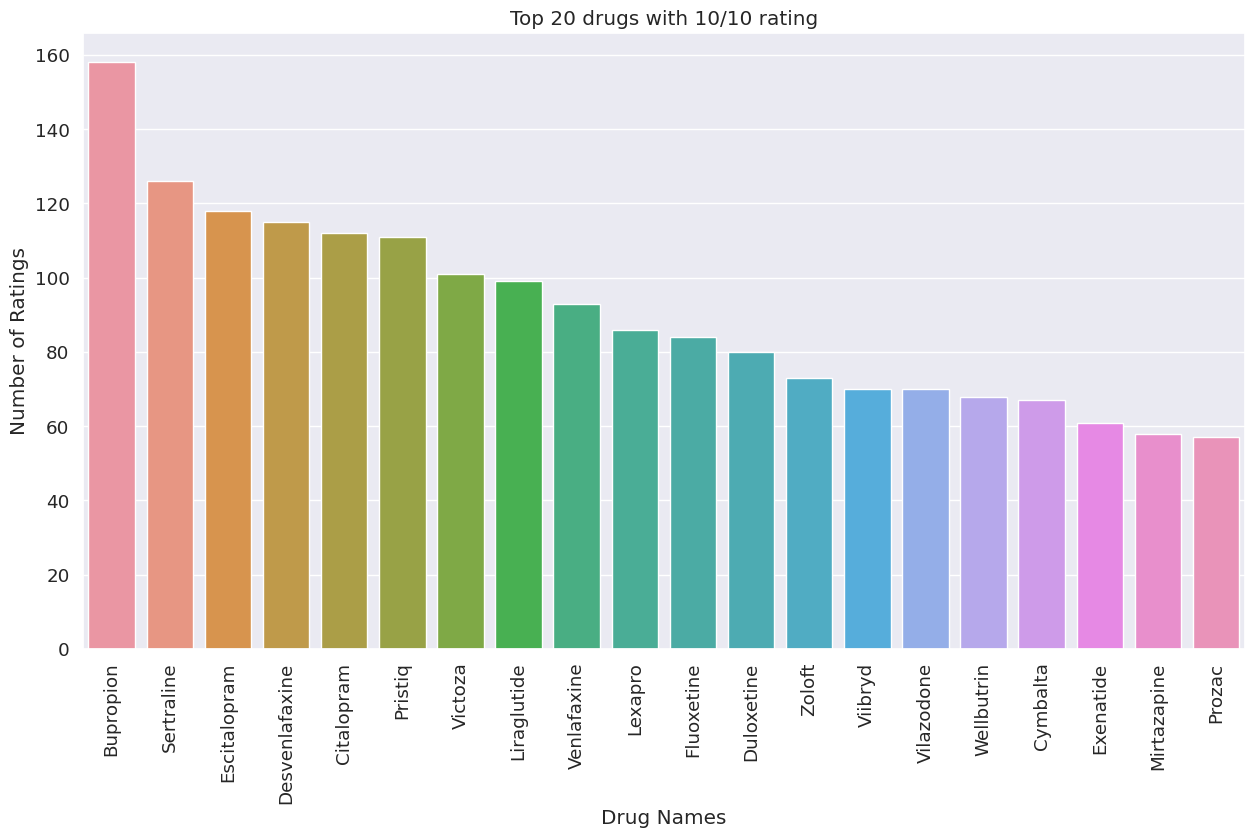

In [36]:
# This barplot shows the top 20 drugs with the 10/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

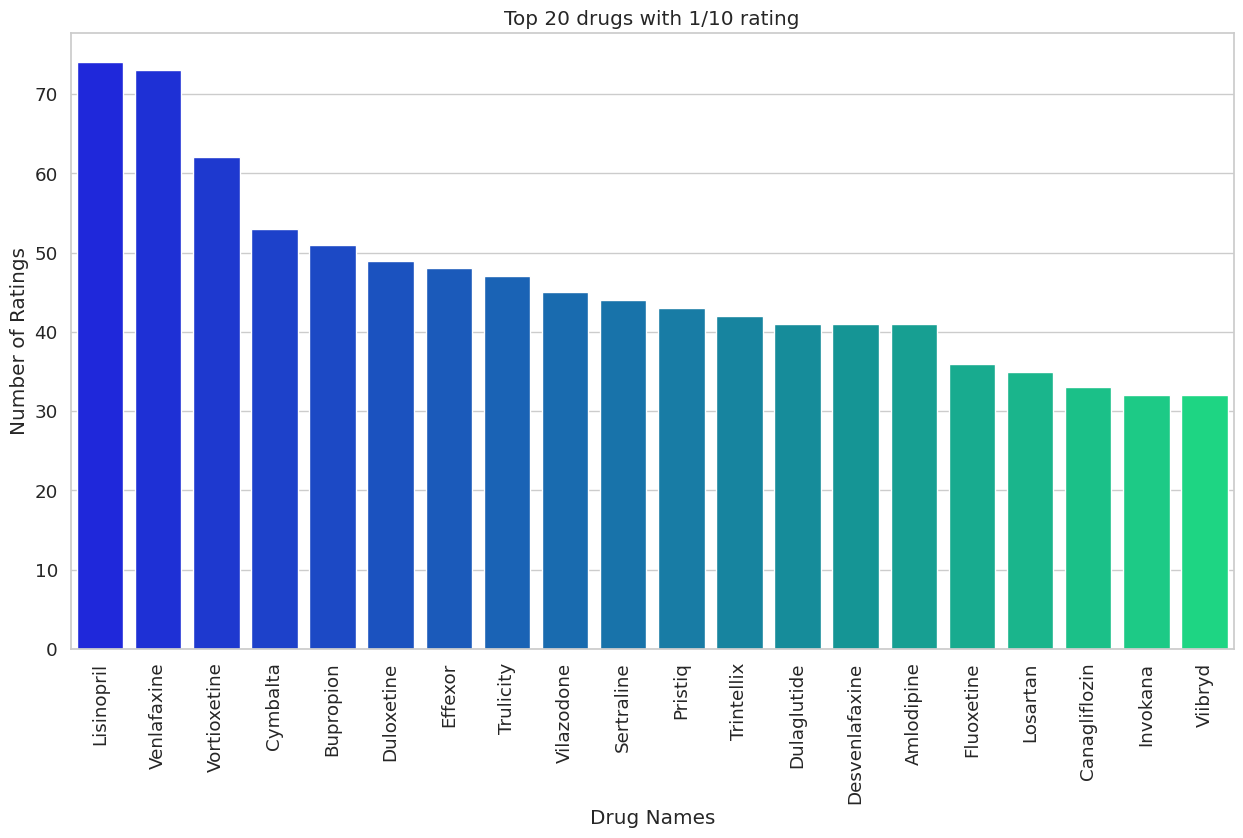

In [37]:
# This barplot shows the Top 20 drugs with the 1/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [38]:
df_data.dtypes

drugname               object
condition              object
review                 object
rating                  int64
date           datetime64[ns]
usefulcount             int64
dtype: object

In [39]:
df_ratings = pd.DataFrame(df_data['rating'])
df_ratings.head(5)

rating
11      10
31       8
44       4
50      10
67      10

In [40]:
type(df_ratings)

pandas.core.frame.DataFrame

Text(0.5, 0, 'Rating')

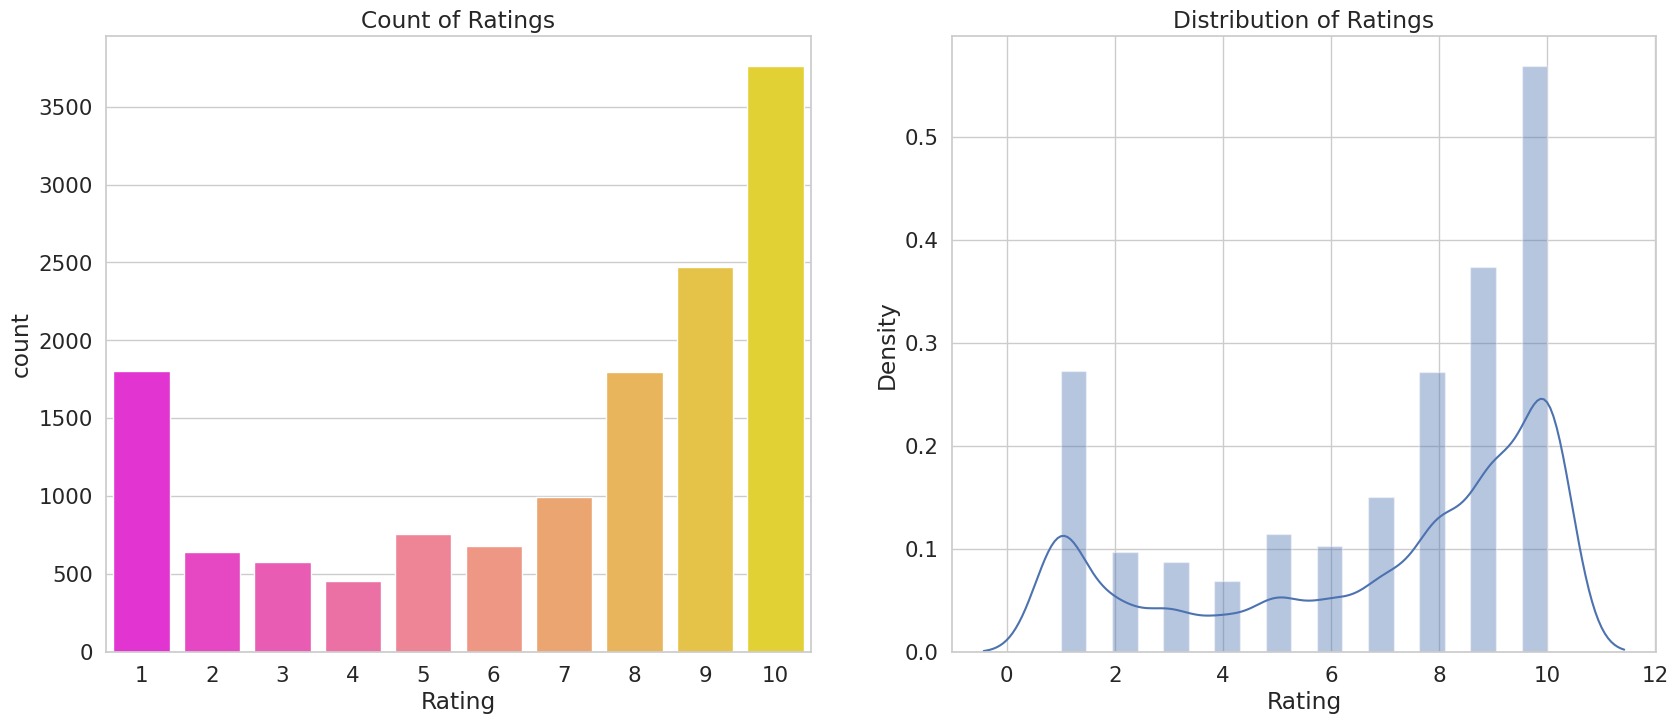

In [41]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

# sns_1 = sns.countplot(df_ratings['rating'], palette = 'spring', order = range(1, 11), ax = ax[0])
sns_1 = sns.countplot(x="rating", data=df_ratings, palette="spring", order=range(1, 11), ax = ax[0])
sns_2 = sns.distplot(df_data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

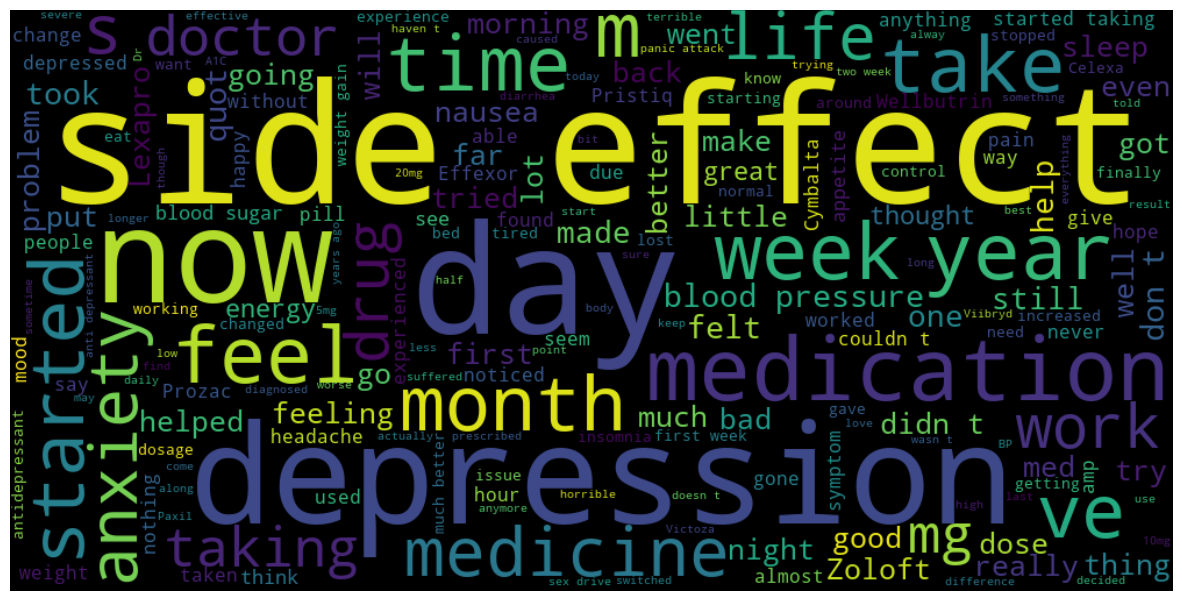

In [42]:
# Word Cloud for all the reviews in the data set.

# concatenate all the reviews into a single string
text = ' '.join(df_data['review'].dropna().astype(str))

# generate the word cloud
wordcloud = WordCloud(width=1000, height=500).generate(text)

# plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

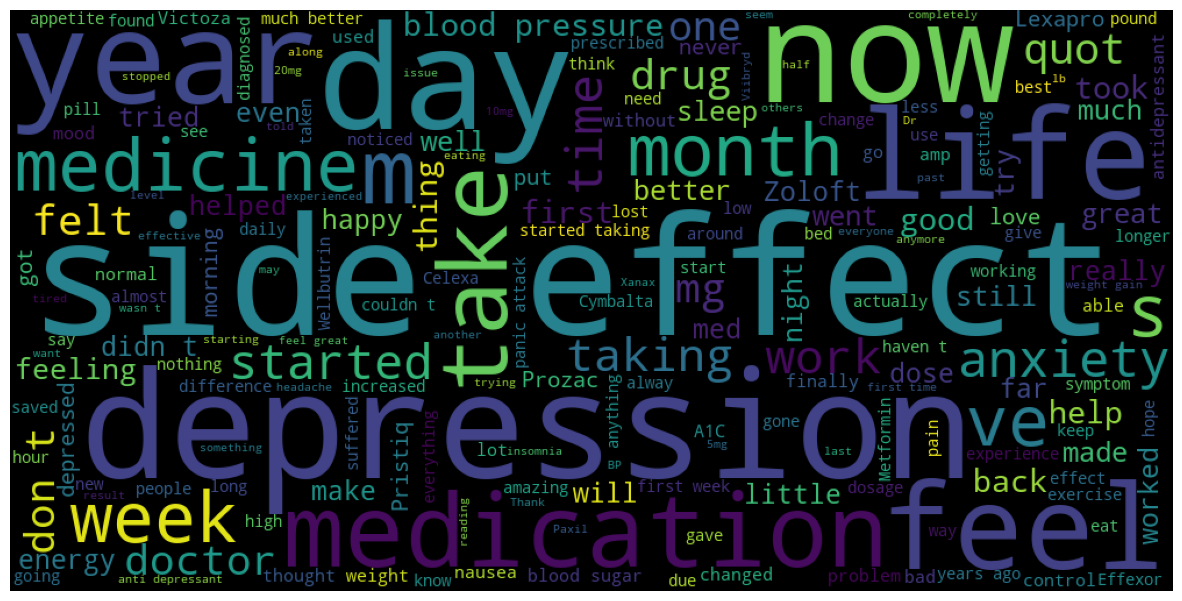

In [43]:
# Word cloud of the reviews with rating equal to 10
df_rate_ten = df_data.loc[df_data.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

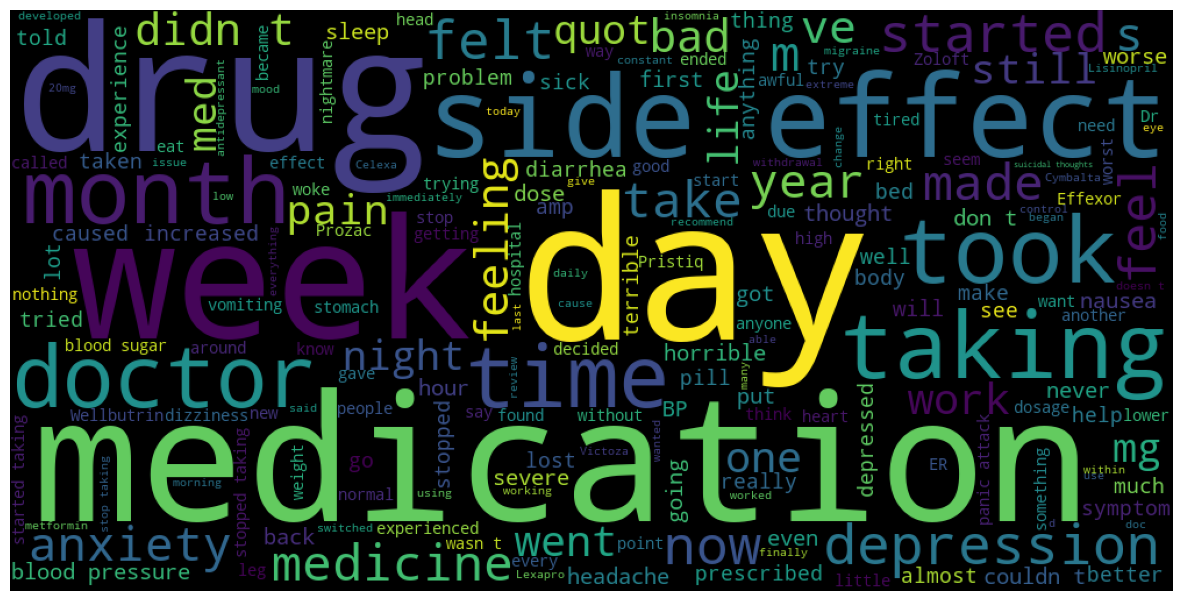

In [44]:
# Word cloud of the reviews with rating equal to 1
df_rate_one = df_data.loc[df_data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

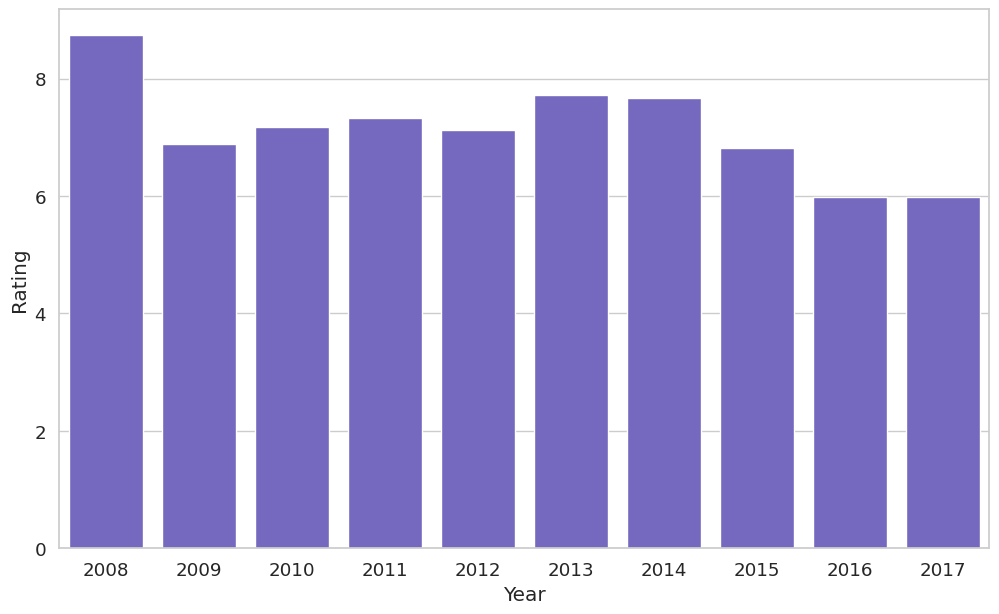

In [45]:
# This barplot shows the mean rating per year

mean_rating = dict(df_data.groupby(df_data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'slateblue');
sns_.set_xlabel('Year')
sns_.set_ylabel('Rating');

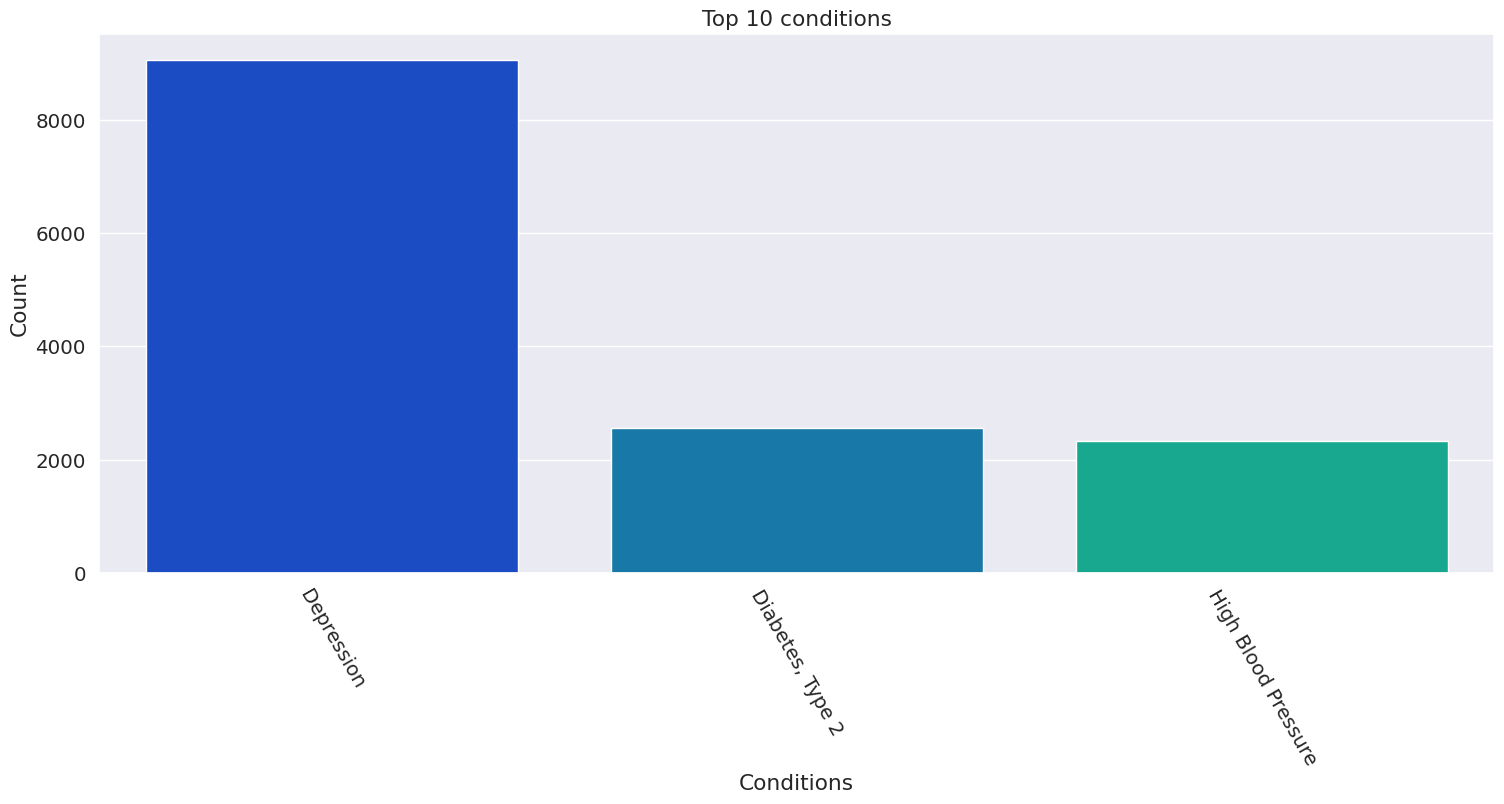

In [46]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(df_data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_xticklabels(rotation=-60, labels=top_condition)
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");


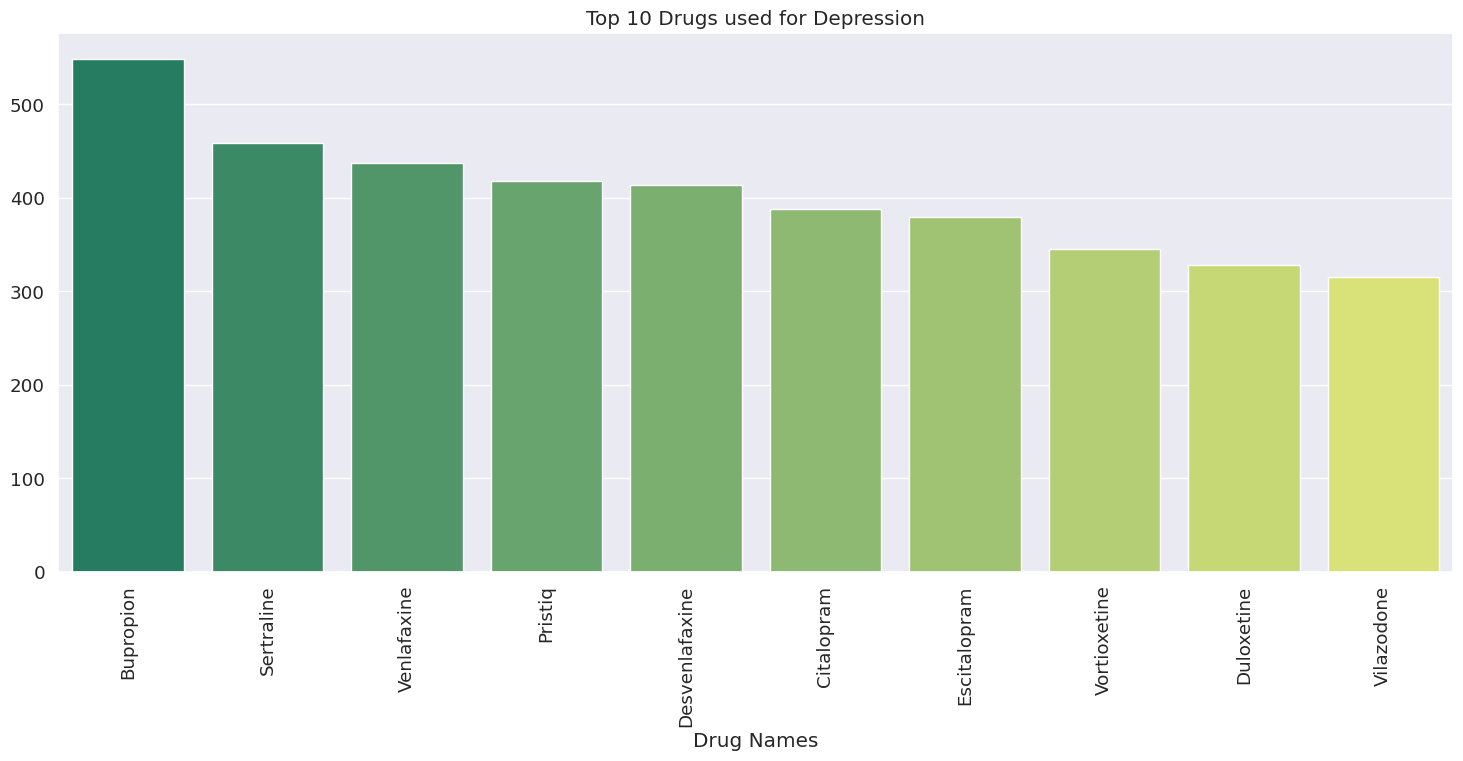

In [47]:
# Top 10 drugs which are used for the condition Depression is 
df = df_data[df_data['condition'] == 'Depression']['drugname'].value_counts()[0: 10 ]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 90);

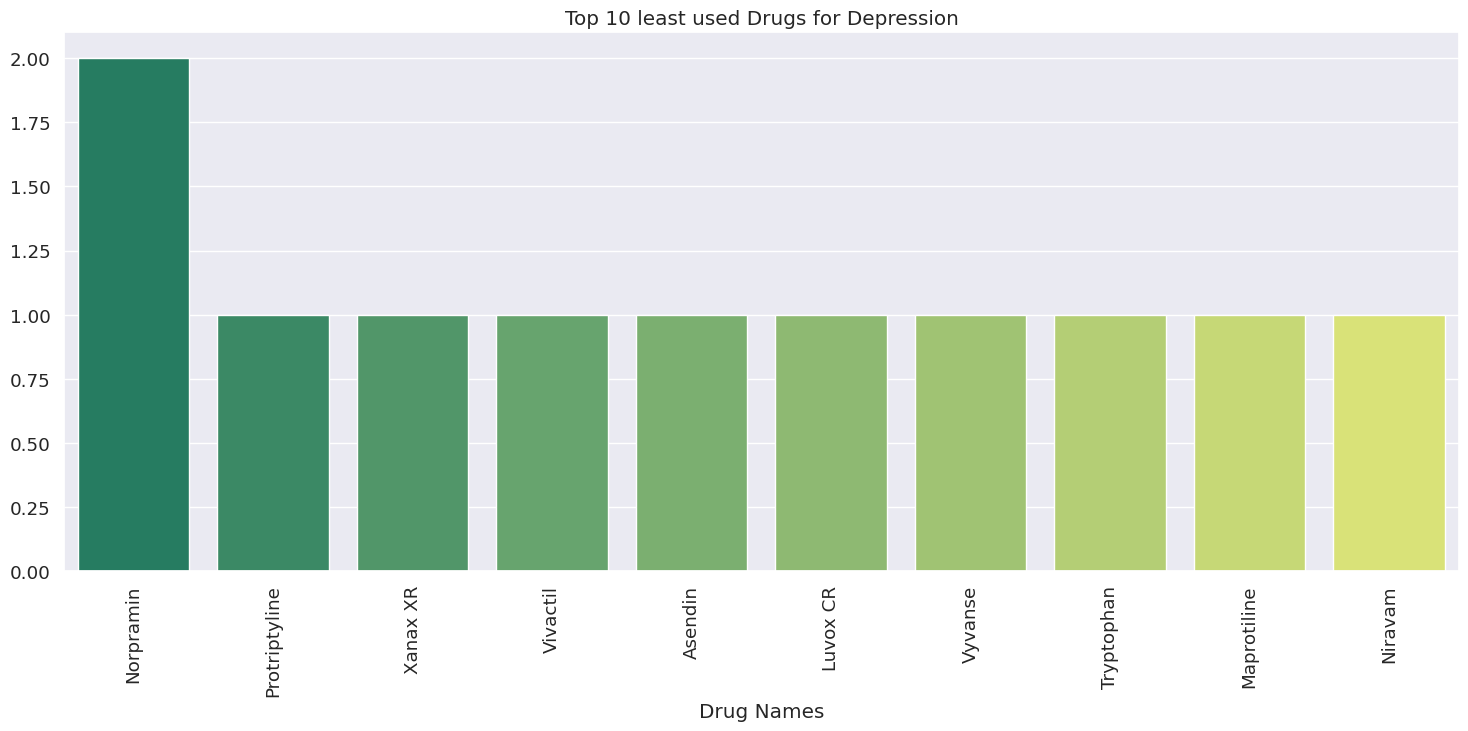

In [48]:
# Top 10 drugs which are used for the condition Depression is 
df = df_data[df_data['condition'] == 'Depression']['drugname'].value_counts()[-10: ]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 least used Drugs for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 90);

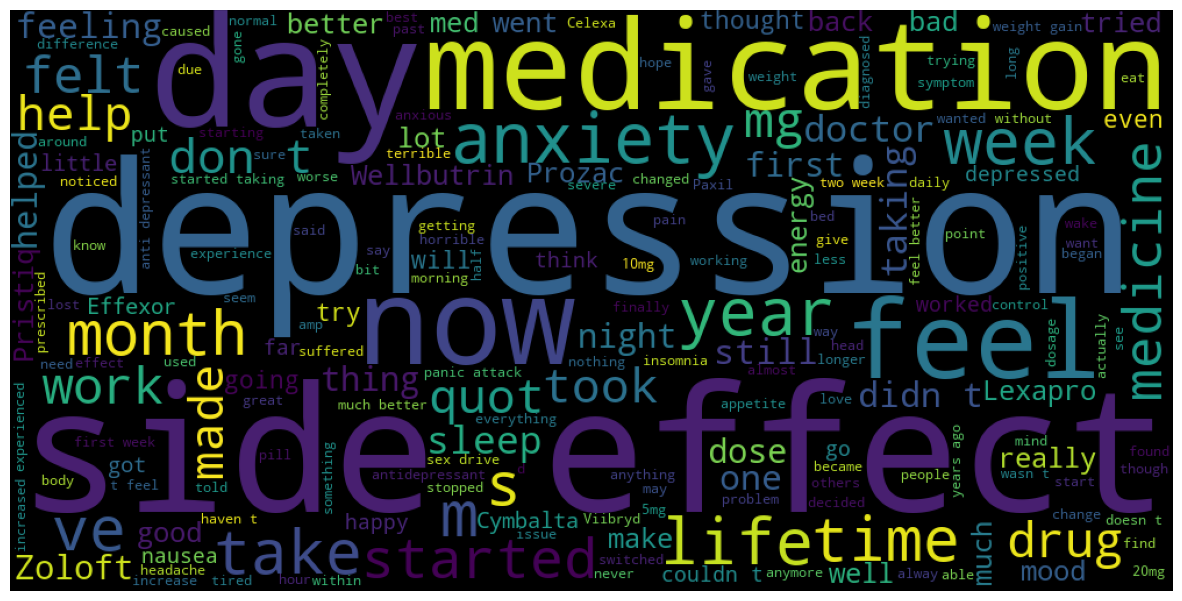

In [49]:
# Word cloud of the reviews of Depression
df_rate_one = df_data[df_data['condition'] == 'Depression']['review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

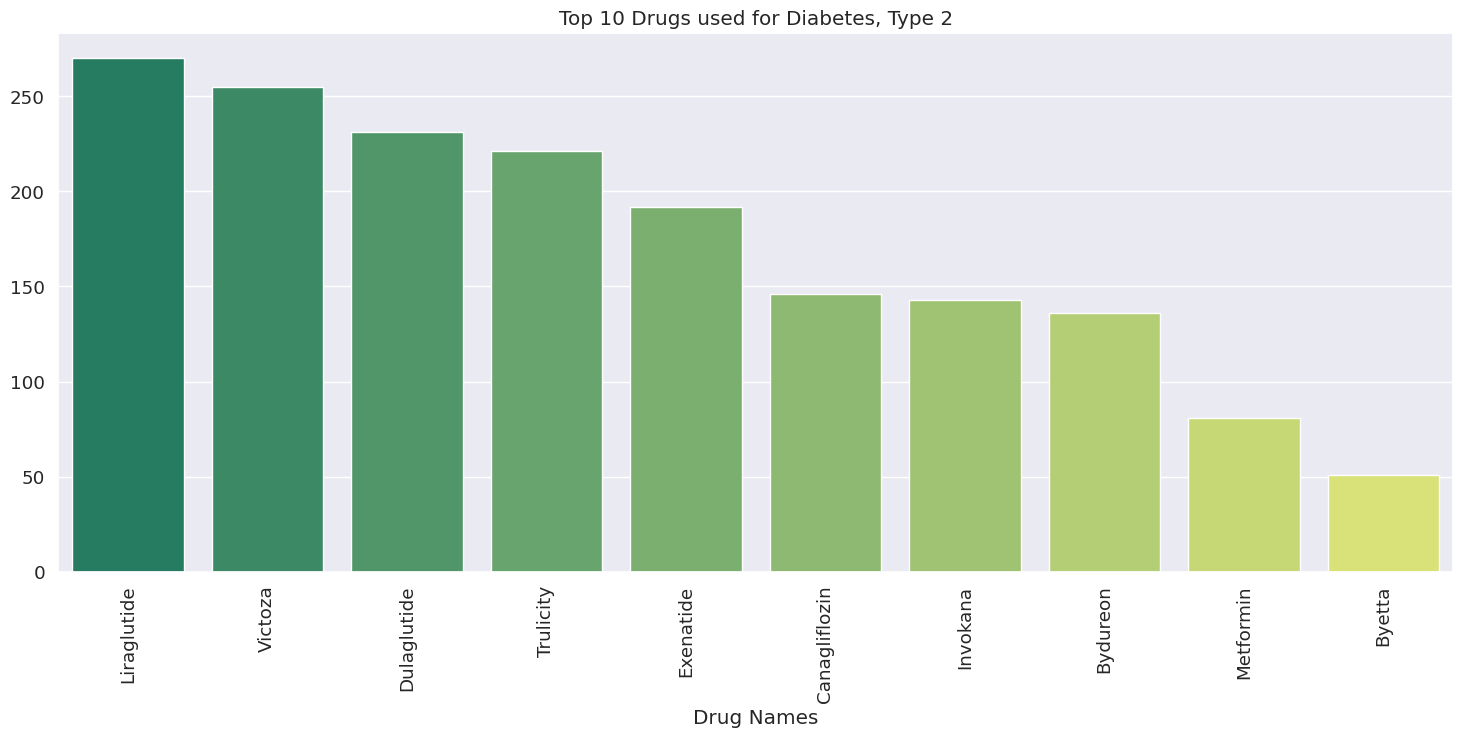

In [50]:
# Top 10 drugs which are used for the condition Diabetes, Type 2 is 
df = df_data[df_data['condition'] == 'Diabetes, Type 2']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Diabetes, Type 2")
plt.setp(sns_.get_xticklabels(), rotation = 90);

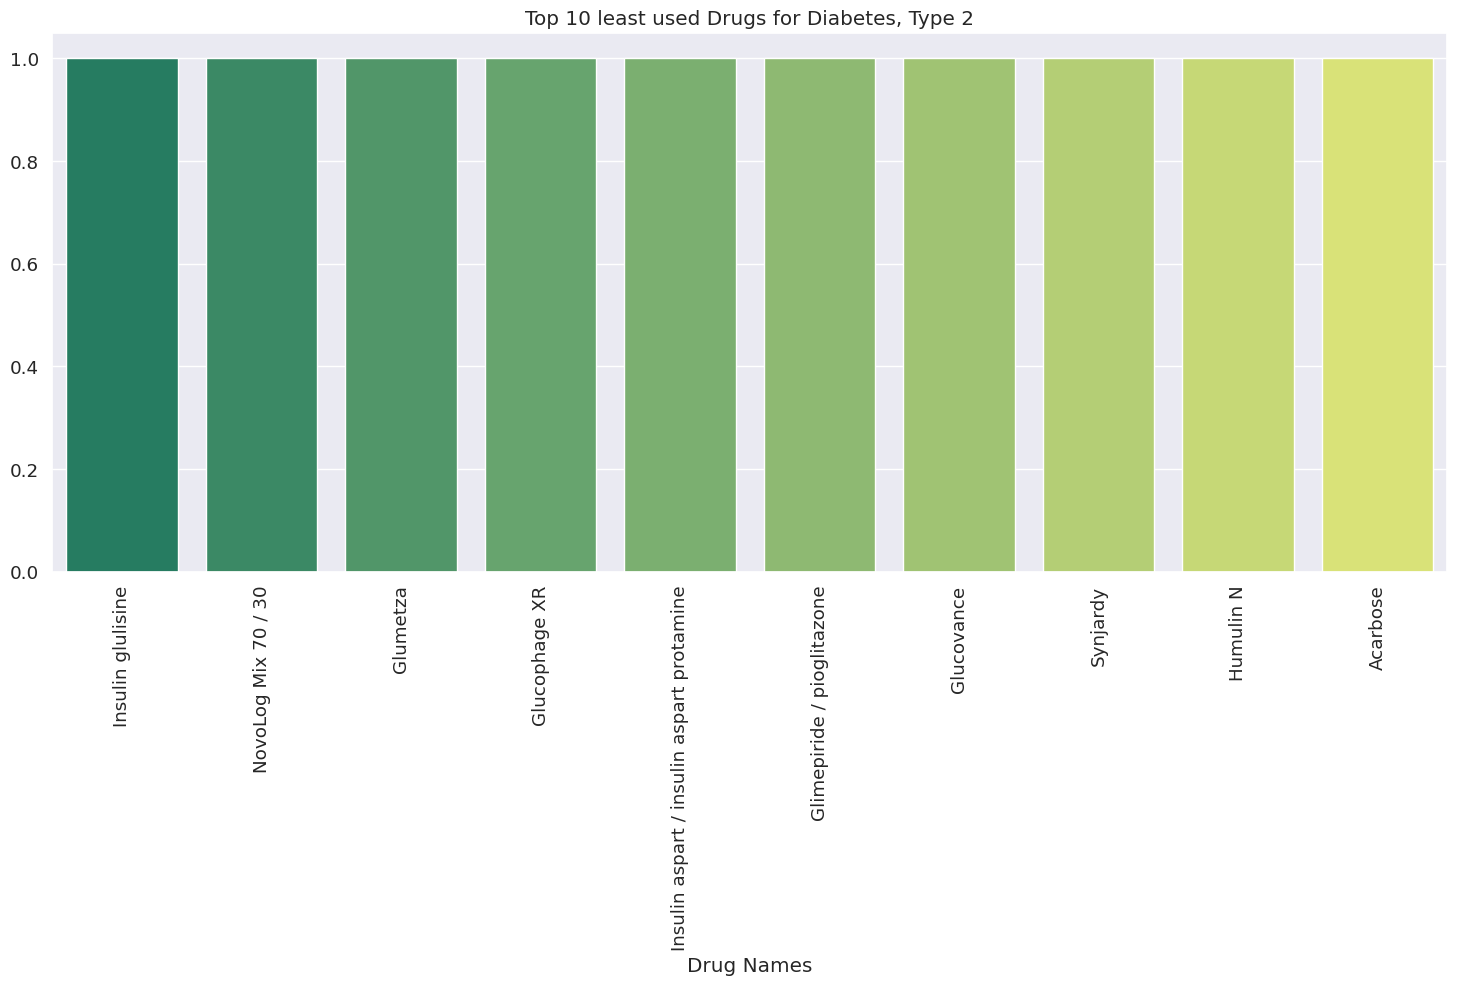

In [51]:
# Top 10 drugs which are used for the condition Diabetes, Type 2 is 
df = df_data[df_data['condition'] == 'Diabetes, Type 2']['drugname'].value_counts()[-10:]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 least used Drugs for Diabetes, Type 2")
plt.setp(sns_.get_xticklabels(), rotation = 90);

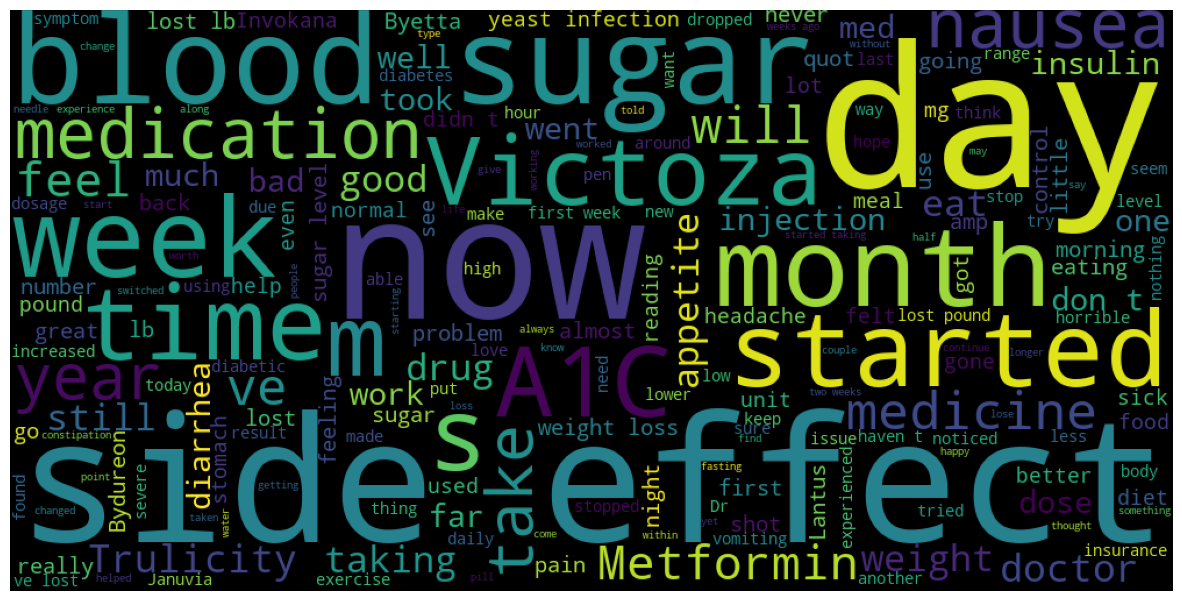

In [52]:
# Word cloud of the reviews of Diabetes, Type 2
df_rate_one = df_data[df_data['condition'] == 'Diabetes, Type 2']['review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

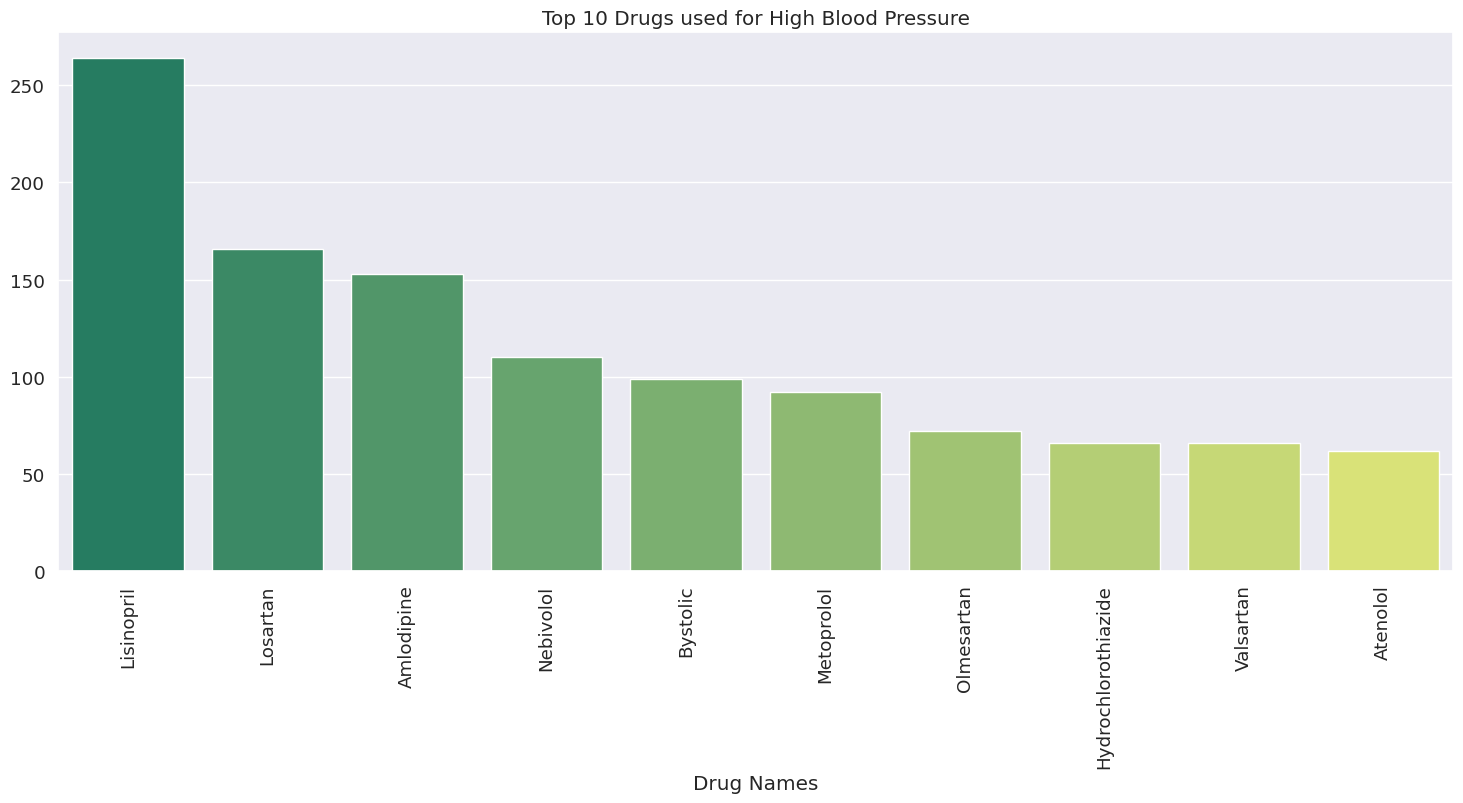

In [53]:
# Top 10 drugs which are used for the condition High Blood Pressure is 
df = df_data[df_data['condition'] == 'High Blood Pressure']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for High Blood Pressure")
plt.setp(sns_.get_xticklabels(), rotation = 90);

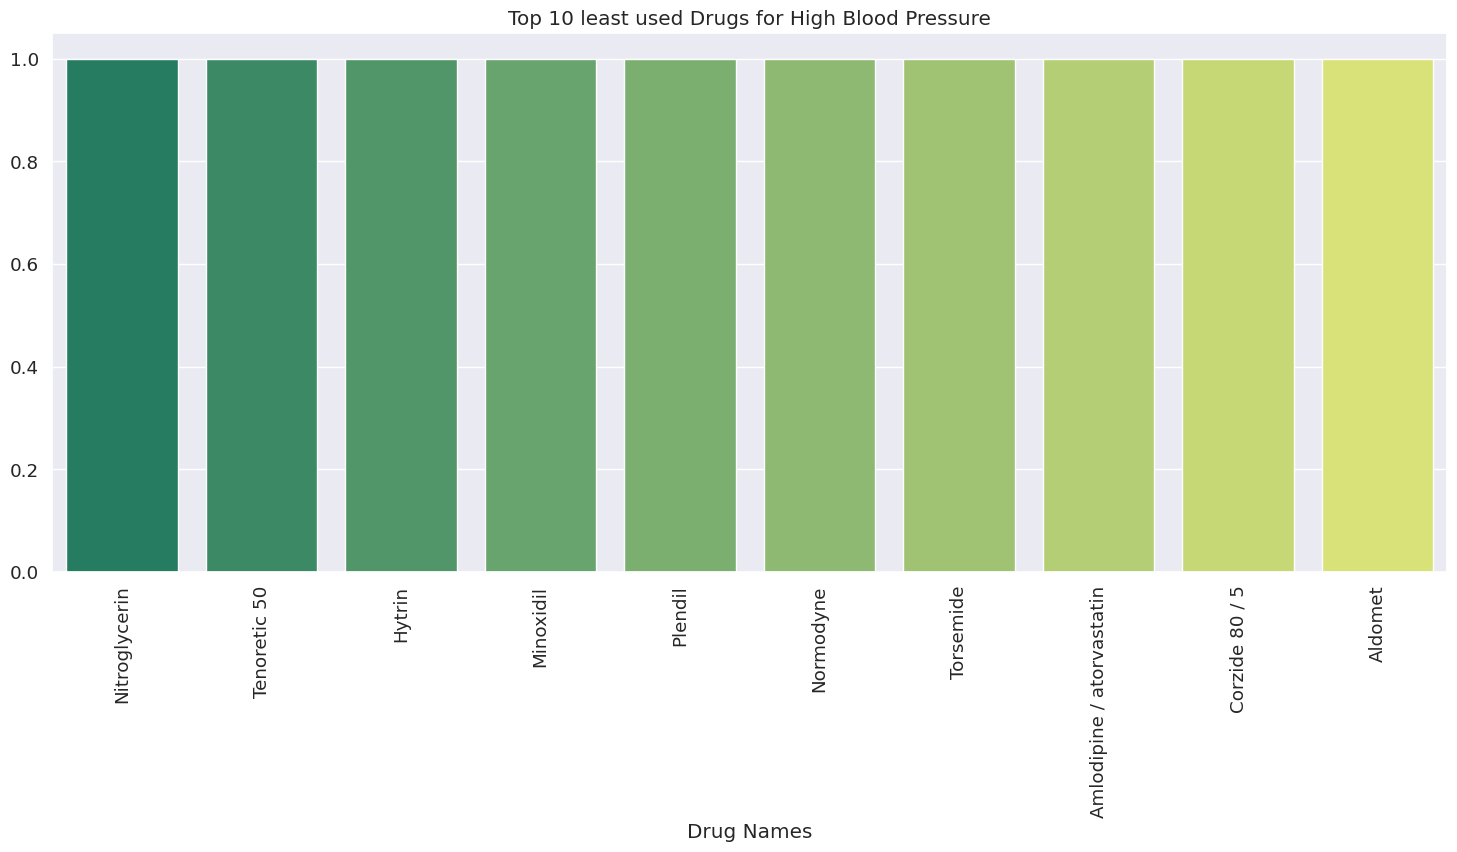

In [54]:
# Top 10 drugs which are used for the condition High Blood Pressure is 
df = df_data[df_data['condition'] == 'High Blood Pressure']['drugname'].value_counts()[-10:]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 least used Drugs for High Blood Pressure")
plt.setp(sns_.get_xticklabels(), rotation = 90);

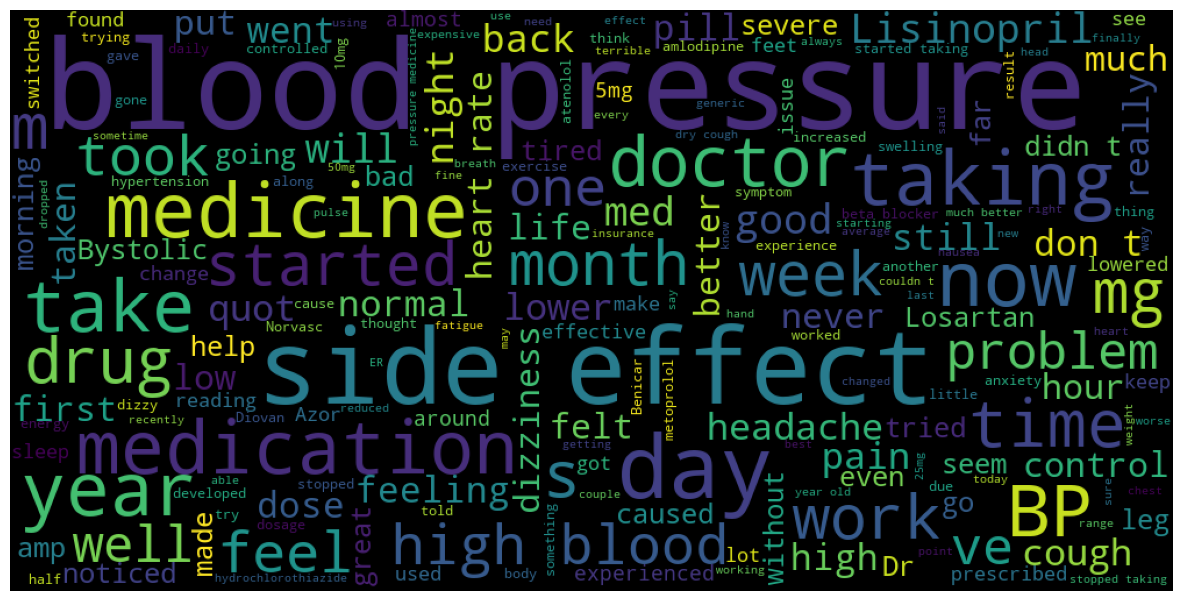

In [55]:
# Word cloud of the reviews of High Blood Pressure
df_rate_one = df_data[df_data['condition'] == 'High Blood Pressure']['review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

<AxesSubplot: xlabel='usefulcount', ylabel='Density'>

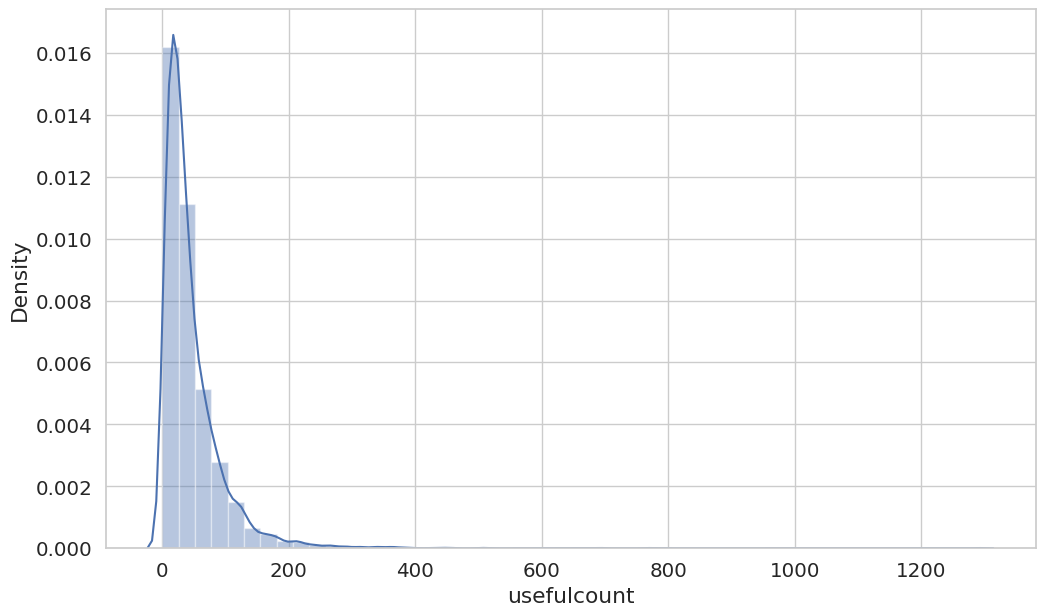

In [56]:
# Distribution of the useful count
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(df_data['usefulcount'].dropna())

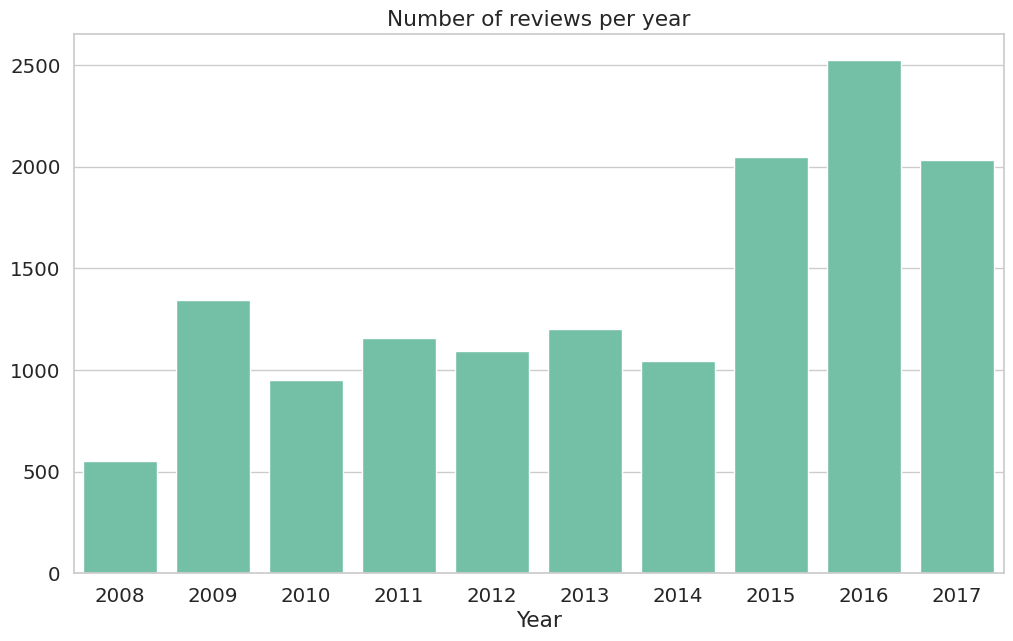

In [57]:
# This barplot shows the number of reviews per year
df = df_data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

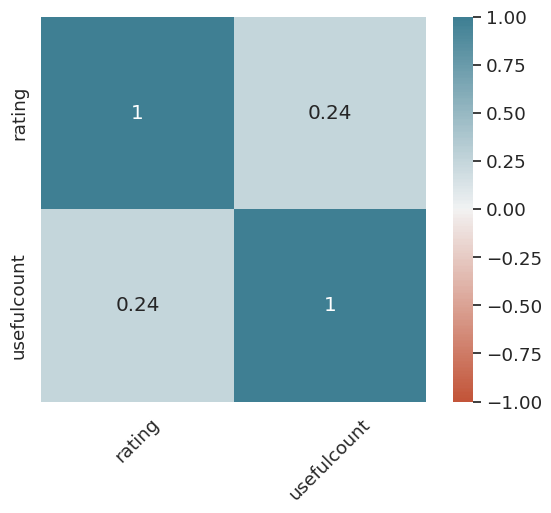

In [58]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

In [59]:
df_data.head()

drugname         condition  \
11  L-methylfolate        Depression   
31      Sertraline        Depression   
44     Venlafaxine        Depression   
50     Dulaglutide  Diabetes, Type 2   
67      Effexor XR        Depression   

                                               review  rating       date  \
11  "I have taken anti-depressants for years, with...      10 2017-03-09   
31  "1 week on Zoloft for anxiety and mood swings....       8 2011-05-07   
44  "my gp started me on Venlafaxine yesterday to ...       4 2016-04-27   
50  "Hey Guys,  It&#039;s been 4 months since my l...      10 2017-10-24   
67  "This medicine saved my life. I was at my wits...      10 2013-06-20   

    usefulcount  
11           54  
31            3  
44            3  
50           24  
67          166

In [60]:
#import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vmr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

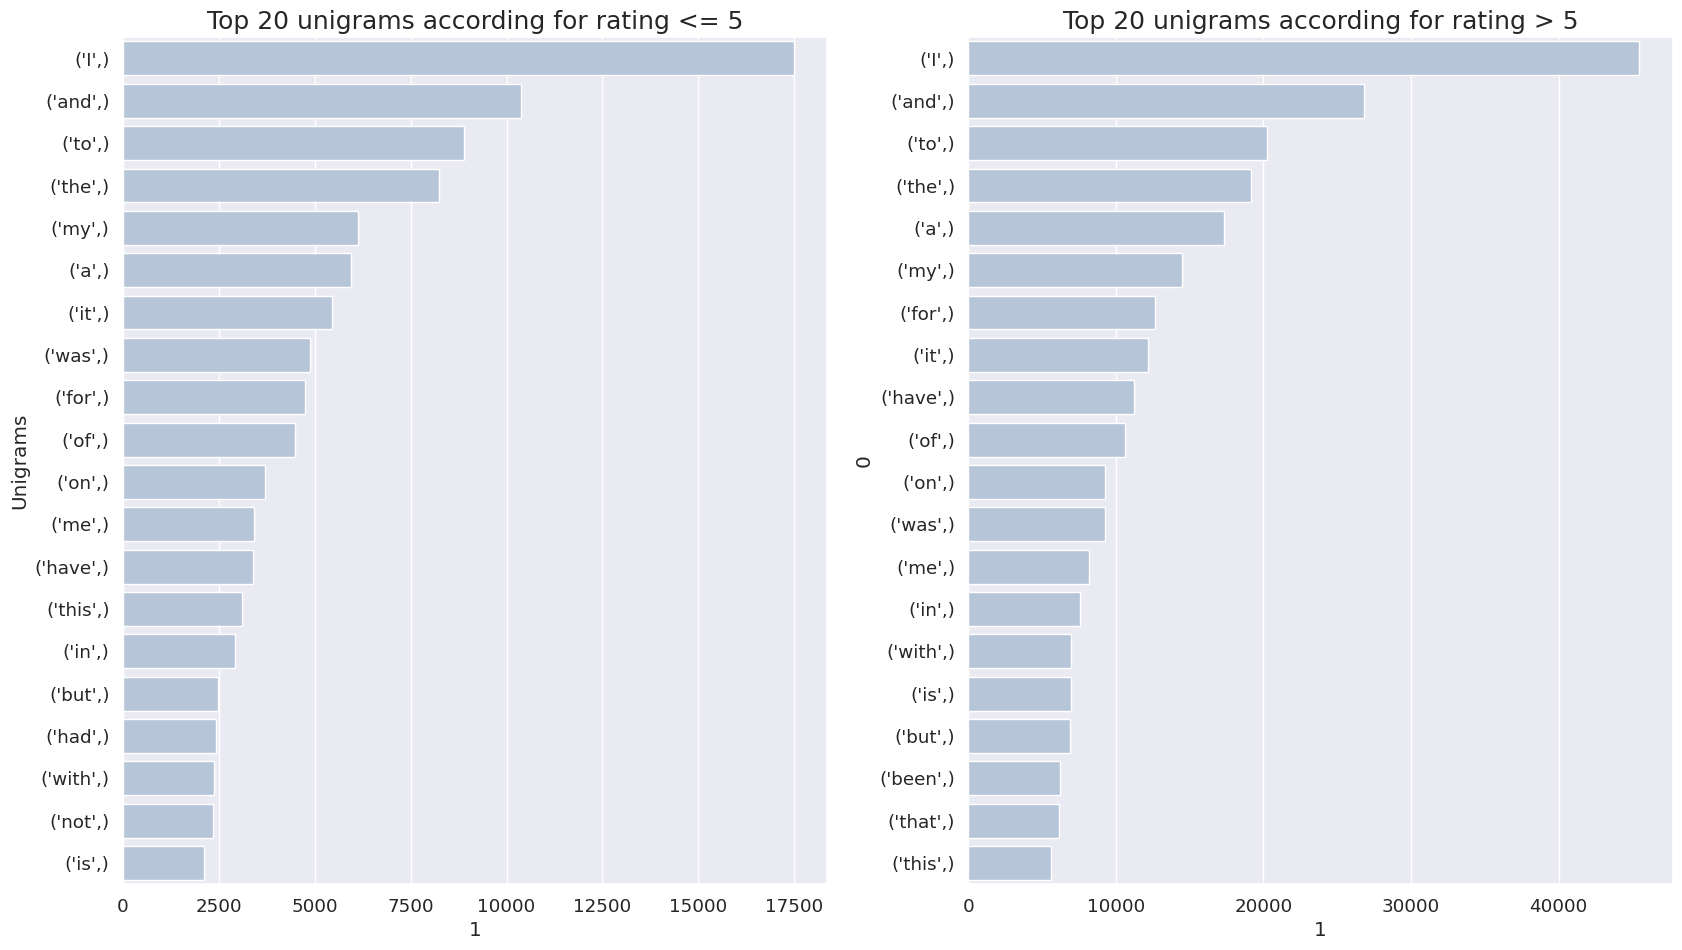

In [61]:
# Top 20 unigrams according to the rating
df_ = df_data[['rating', 'review']]
df_['review'] = df_data['review'].str.replace("&#039;", "")
df_['review'] = df_['review'].str.replace(r'[^\w\d\s]',' ')

df_review_5 = " ".join(df_.loc[df_.rating <= 5, 'review'])
df_review_10 = " ".join(df_.loc[df_.rating > 5, 'review'])

token_review_5 = word_tokenize(df_review_5)
token_review_10 = word_tokenize(df_review_10)

unigrams_5 = ngrams(token_review_5, 1)
unigrams_10 = ngrams(token_review_10, 1)

frequency_5 = Counter(unigrams_5)
frequency_10 = Counter(unigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [20,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'lightsteelblue', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'lightsteelblue', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 unigrams according for rating <= 5")
sns_10.set_title("Top 20 unigrams according for rating > 5")
sns_5.set_ylabel("Unigrams");

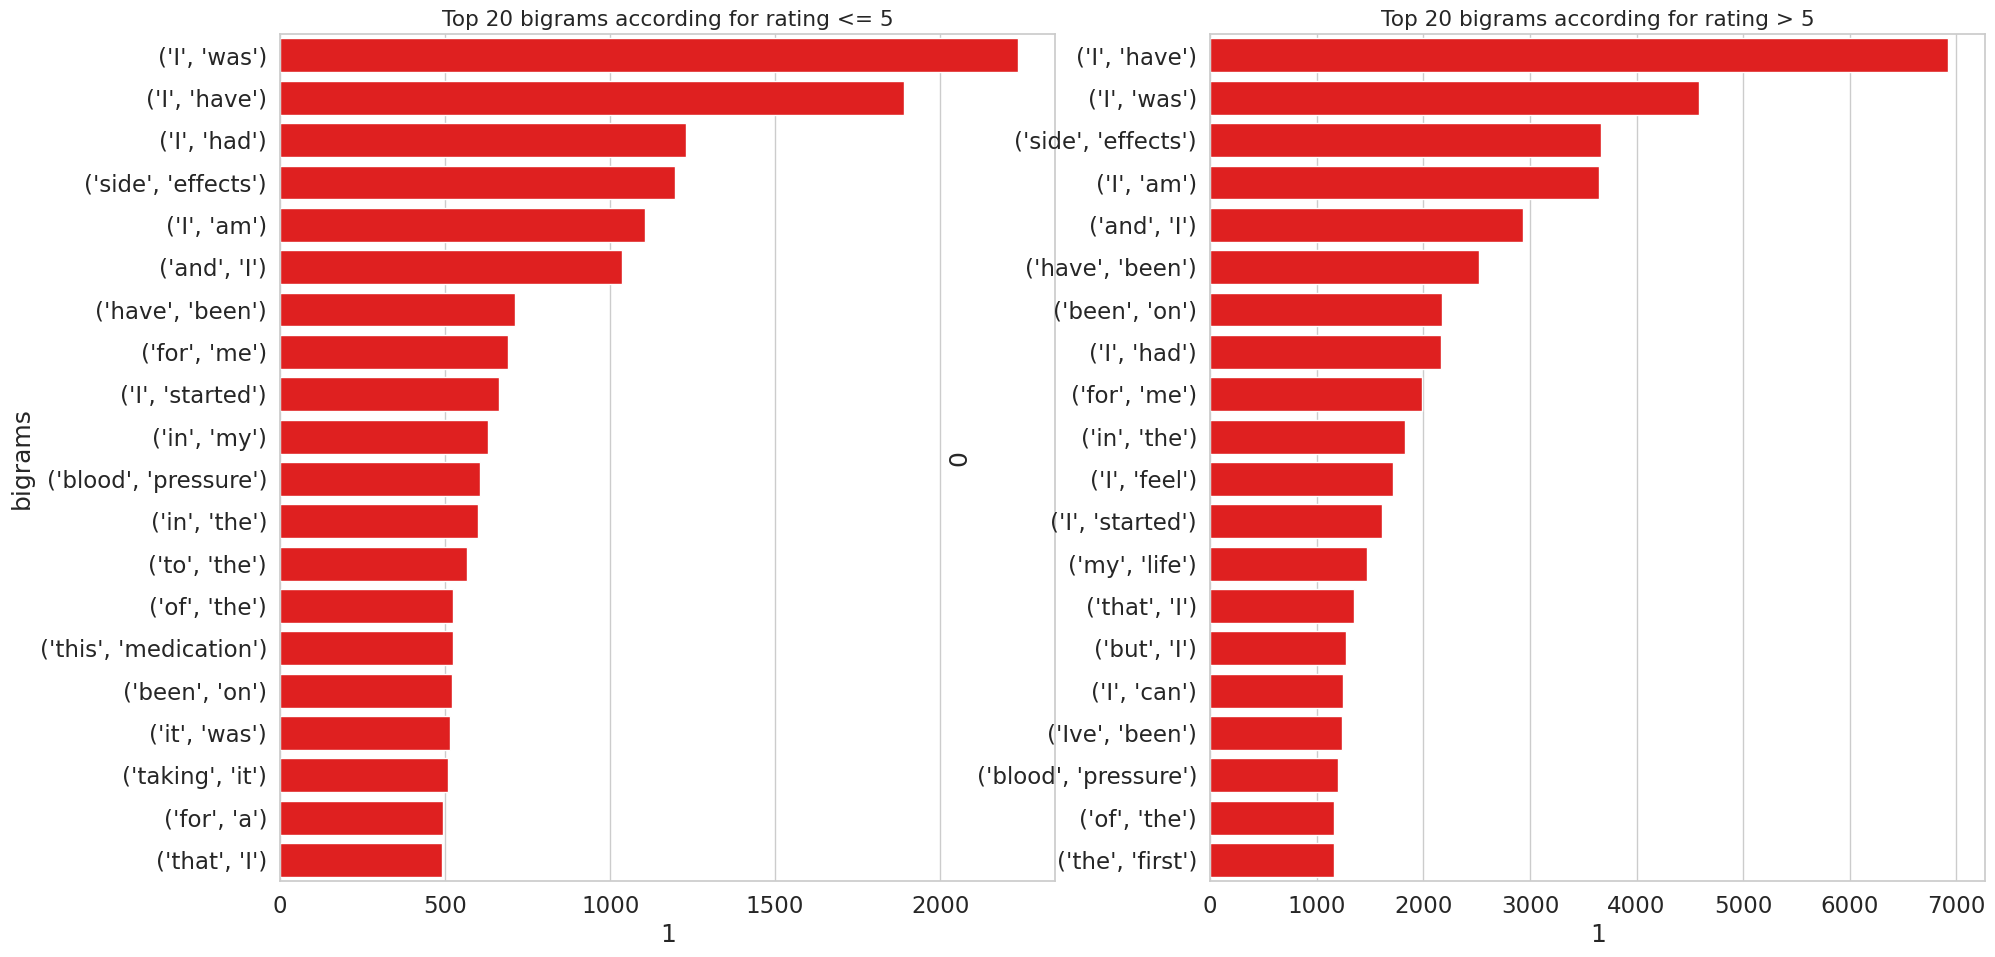

In [62]:
# Top 20 bigrams according to the rating
bigrams_5 = ngrams(token_review_5, 2)
bigrams_10 = ngrams(token_review_10, 2)

frequency_5 = Counter(bigrams_5)
frequency_10 = Counter(bigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [22,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'red', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'red', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 bigrams according for rating <= 5")
sns_10.set_title("Top 20 bigrams according for rating > 5")
sns_5.set_ylabel("bigrams");

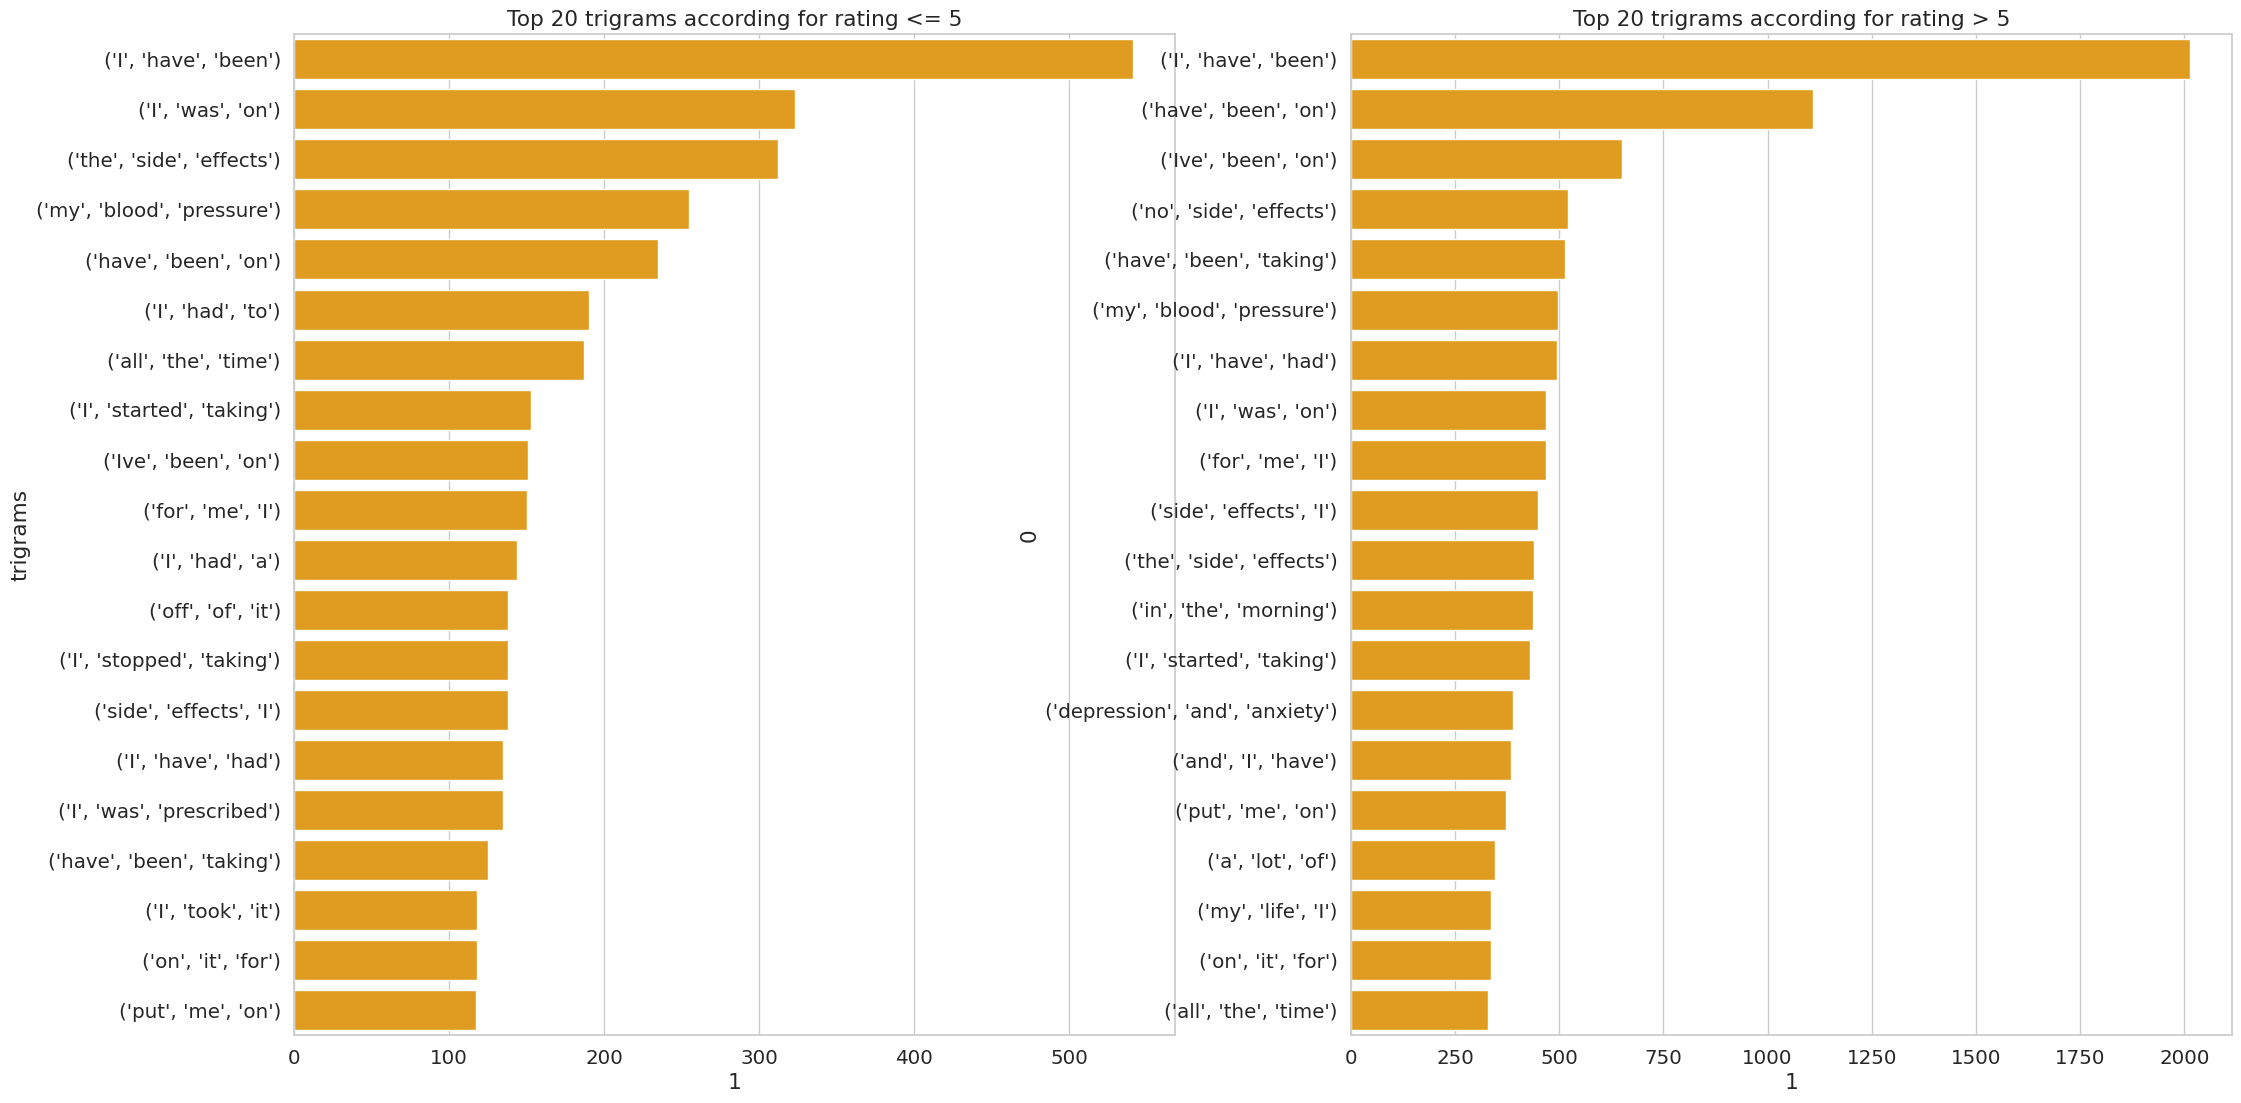

In [63]:
# Top 20 trigrams according to the rating
trigrams_5 = ngrams(token_review_5, 3)
trigrams_10 = ngrams(token_review_10, 3)

frequency_5 = Counter(trigrams_5)
frequency_10 = Counter(trigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 trigrams
plt.rcParams['figure.figsize'] = [25,13]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'orange', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'orange', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 trigrams according for rating <= 5")
sns_10.set_title("Top 20 trigrams according for rating > 5")
sns_5.set_ylabel("trigrams");

In [64]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/vmr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

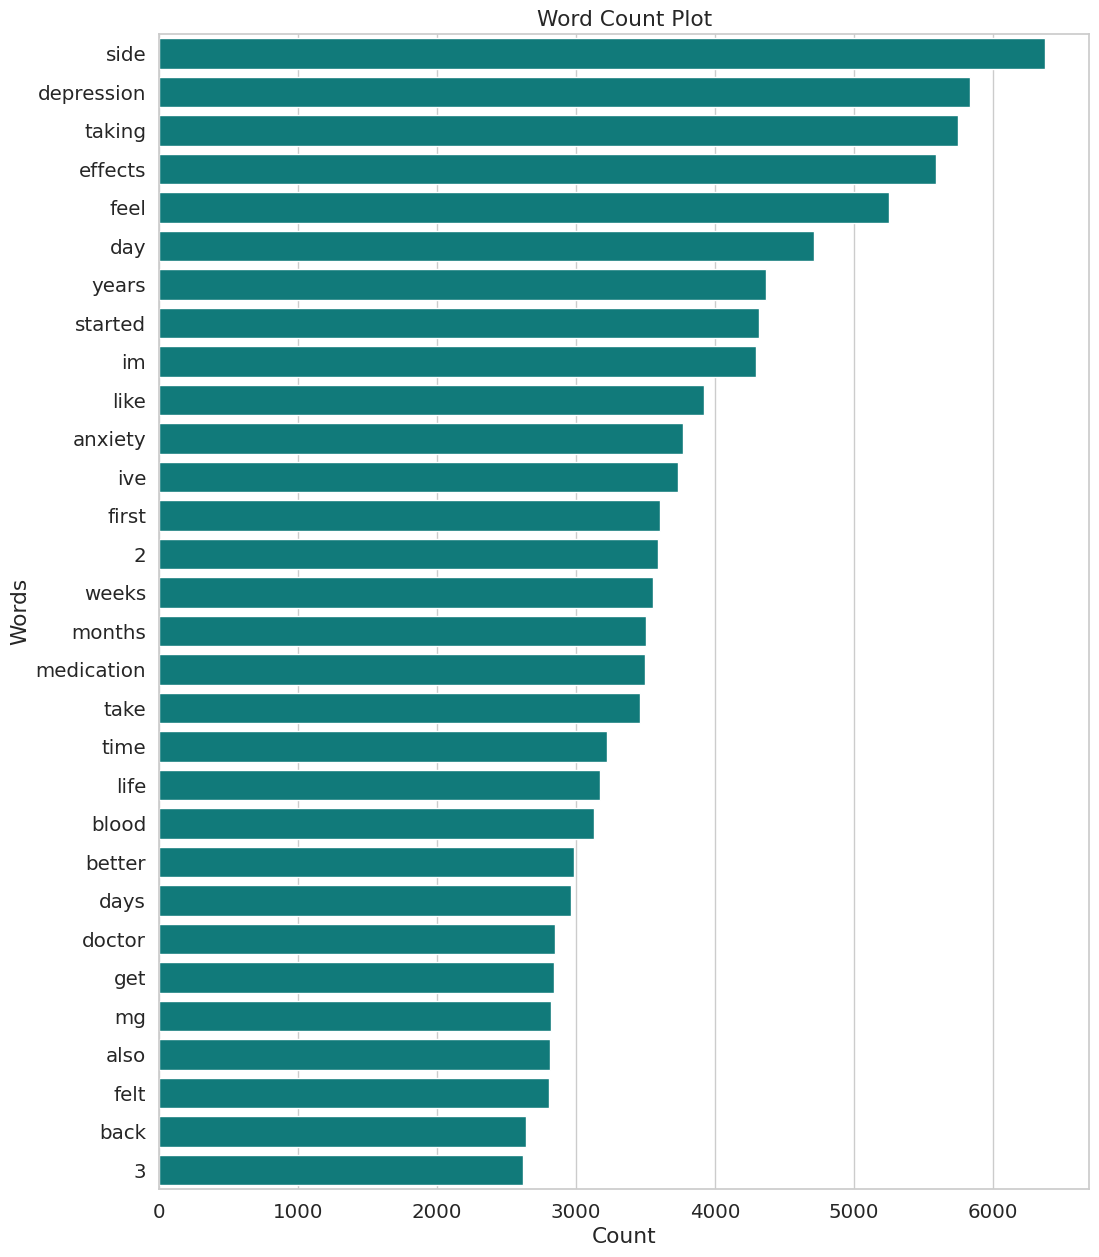

In [65]:
# Word count plot

# Removing the stop words before plotting
stop_words = set(stopwords.words('english'))
df_['review'] = df_['review'].str.lower()
df_['review_1'] = df_['review'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df_review = " ".join(df_['review_1'])
tokenize = word_tokenize(df_review)
frequency = Counter(tokenize)
df = pd.DataFrame(frequency.most_common(30))

plt.rcParams['figure.figsize'] = [12, 15]
sns.set(font_scale = 1.3, style = 'whitegrid')

# plotting
word_count = sns.barplot(x = df[1], y = df[0], color = 'darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");

### Preprocessing the reviews for the best polarity and classification

In [66]:
# Giving the Sentiment according to the ratings
df_data['sentiment_rate'] = df_data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [67]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [68]:
#df_data['review_clean'] = df_data['review'].apply(review_clean)
df_data['review_clean'] = review_clean(df_data['review'])

In [69]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [70]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [71]:
df_data['review_clean'][0: 10]

11     taken anti depress year improv most moder seve...
31     1 week zoloft anxieti mood swing take 50mg mor...
44     gp start venlafaxin yesterday help depress cha...
50     hey guy 4 month sinc last post want give month...
67     medicin save life wit end anti depress readi g...
81     start take slept well night awok earli around ...
96     intak effexor xr 375 mg lorazepam depress anxi...
104    blood pressur around 160 100 doctor prescrib a...
143    medic amaz 3 day extrem sick start feel amaz 1...
146    recent refer endocrinologist start trulic jard...
Name: review_clean, dtype: object

In [72]:
# Separating the day, month and year from the Date
df_data['day'] = df_data['date'].dt.day
df_data['month'] = df_data['date'].dt.month
df_data['year'] = df_data['date'].dt.year

In [73]:
df_data.head(2)

drugname   condition  \
11  L-methylfolate  Depression   
31      Sertraline  Depression   

                                               review  rating       date  \
11  "I have taken anti-depressants for years, with...      10 2017-03-09   
31  "1 week on Zoloft for anxiety and mood swings....       8 2011-05-07   

    usefulcount  sentiment_rate  \
11           54               1   
31            3               1   

                                         review_clean  day  month  year  
11  taken anti depress year improv most moder seve...    9      3  2017  
31  1 week zoloft anxieti mood swing take 50mg mor...    7      5  2011

In review_clean column of the above data frame we have applied the below operations
- changing to lower case
- Replacing the repeating pattern of &#039;
- Removing all the special Characters
- Removing all the non ASCII characters
- Removing the leading and trailing Whitespaces
- Replacing multiple Spaces with Single Space
- Replacing Two or more dots with one

In [74]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [75]:
df_data.head(2)

drugname   condition  \
11  L-methylfolate  Depression   
31      Sertraline  Depression   

                                               review  rating       date  \
11  "I have taken anti-depressants for years, with...      10 2017-03-09   
31  "1 week on Zoloft for anxiety and mood swings....       8 2011-05-07   

    usefulcount  sentiment_rate  \
11           54               1   
31            3               1   

                                         review_clean  day  month  year  
11  taken anti depress year improv most moder seve...    9      3  2017  
31  1 week zoloft anxieti mood swing take 50mg mor...    7      5  2011

In [76]:
df_data['sentiment'] = sentiment(df_data['review'])

In [77]:
df_data.head(2)

drugname   condition  \
11  L-methylfolate  Depression   
31      Sertraline  Depression   

                                               review  rating       date  \
11  "I have taken anti-depressants for years, with...      10 2017-03-09   
31  "1 week on Zoloft for anxiety and mood swings....       8 2011-05-07   

    usefulcount  sentiment_rate  \
11           54               1   
31            3               1   

                                         review_clean  day  month  year  \
11  taken anti depress year improv most moder seve...    9      3  2017   
31  1 week zoloft anxieti mood swing take 50mg mor...    7      5  2011   

    sentiment  
11   0.275000  
31   0.166667

In [78]:
df_data['sentiment_clean'] = sentiment(df_data['review_clean'])

In [79]:
df_data.head(2)

drugname   condition  \
11  L-methylfolate  Depression   
31      Sertraline  Depression   

                                               review  rating       date  \
11  "I have taken anti-depressants for years, with...      10 2017-03-09   
31  "1 week on Zoloft for anxiety and mood swings....       8 2011-05-07   

    usefulcount  sentiment_rate  \
11           54               1   
31            3               1   

                                         review_clean  day  month  year  \
11  taken anti depress year improv most moder seve...    9      3  2017   
31  1 week zoloft anxieti mood swing take 50mg mor...    7      5  2011   

    sentiment  sentiment_clean  
11   0.275000         0.240972  
31   0.166667         0.166667

The Correlation coefficient between the sentiment of the uncleaned review with rating is greater than the cleaned review, so now lets try without the snowball stemmer and without removing the stopwords.

In [80]:
np.corrcoef(df_data['sentiment'], df_data['rating'])

array([[1.        , 0.38708344],
       [0.38708344, 1.        ]])

In [81]:
np.corrcoef(df_data['sentiment_clean'], df_data['rating'])

array([[1.        , 0.27030167],
       [0.27030167, 1.        ]])

In [82]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df_data['review_clean_ss'] = review_clean(df_data['review'])
df_data['sentiment_clean_ss'] = sentiment(df_data['review_clean_ss'])

In [83]:
df_data.head(2)

drugname   condition  \
11  L-methylfolate  Depression   
31      Sertraline  Depression   

                                               review  rating       date  \
11  "I have taken anti-depressants for years, with...      10 2017-03-09   
31  "1 week on Zoloft for anxiety and mood swings....       8 2011-05-07   

    usefulcount  sentiment_rate  \
11           54               1   
31            3               1   

                                         review_clean  day  month  year  \
11  taken anti depress year improv most moder seve...    9      3  2017   
31  1 week zoloft anxieti mood swing take 50mg mor...    7      5  2011   

    sentiment  sentiment_clean  \
11   0.275000         0.240972   
31   0.166667         0.166667   

                                      review_clean_ss  sentiment_clean_ss  
11  i have taken anti depressants for years with s...            0.275000  
31  1 week on zoloft for anxiety and mood swings i...           -0.055556

In [84]:
np.corrcoef(df_data['sentiment_clean_ss'], df_data['rating'])

array([[1.        , 0.38523843],
       [0.38523843, 1.        ]])

In [85]:
np.corrcoef(df_data['sentiment_clean'], df_data['rating'])

array([[1.        , 0.27030167],
       [0.27030167, 1.        ]])

In [86]:
np.corrcoef(df_data['sentiment'], df_data['rating'])

array([[1.        , 0.38708344],
       [0.38708344, 1.        ]])

In [87]:
df_data['condition'].value_counts().head(20)

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [88]:
df_data.head(2)

drugname   condition  \
11  L-methylfolate  Depression   
31      Sertraline  Depression   

                                               review  rating       date  \
11  "I have taken anti-depressants for years, with...      10 2017-03-09   
31  "1 week on Zoloft for anxiety and mood swings....       8 2011-05-07   

    usefulcount  sentiment_rate  \
11           54               1   
31            3               1   

                                         review_clean  day  month  year  \
11  taken anti depress year improv most moder seve...    9      3  2017   
31  1 week zoloft anxieti mood swing take 50mg mor...    7      5  2011   

    sentiment  sentiment_clean  \
11   0.275000         0.240972   
31   0.166667         0.166667   

                                      review_clean_ss  sentiment_clean_ss  
11  i have taken anti depressants for years with s...            0.275000  
31  1 week on zoloft for anxiety and mood swings i...           -0.055556

### Feature Engineering

In [89]:
#Word count in each review
df_data['count_word']=df_data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
df_data['count_unique_word']=df_data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_data['count_letters']=df_data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df_data["count_punctuations"] = df_data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_data["count_words_upper"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_data["count_words_title"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_data["count_stopwords"] = df_data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df_data["mean_word_len"] = df_data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [90]:
df_data.columns

Index(['drugname', 'condition', 'review', 'rating', 'date', 'usefulcount',
       'sentiment_rate', 'review_clean', 'day', 'month', 'year', 'sentiment',
       'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

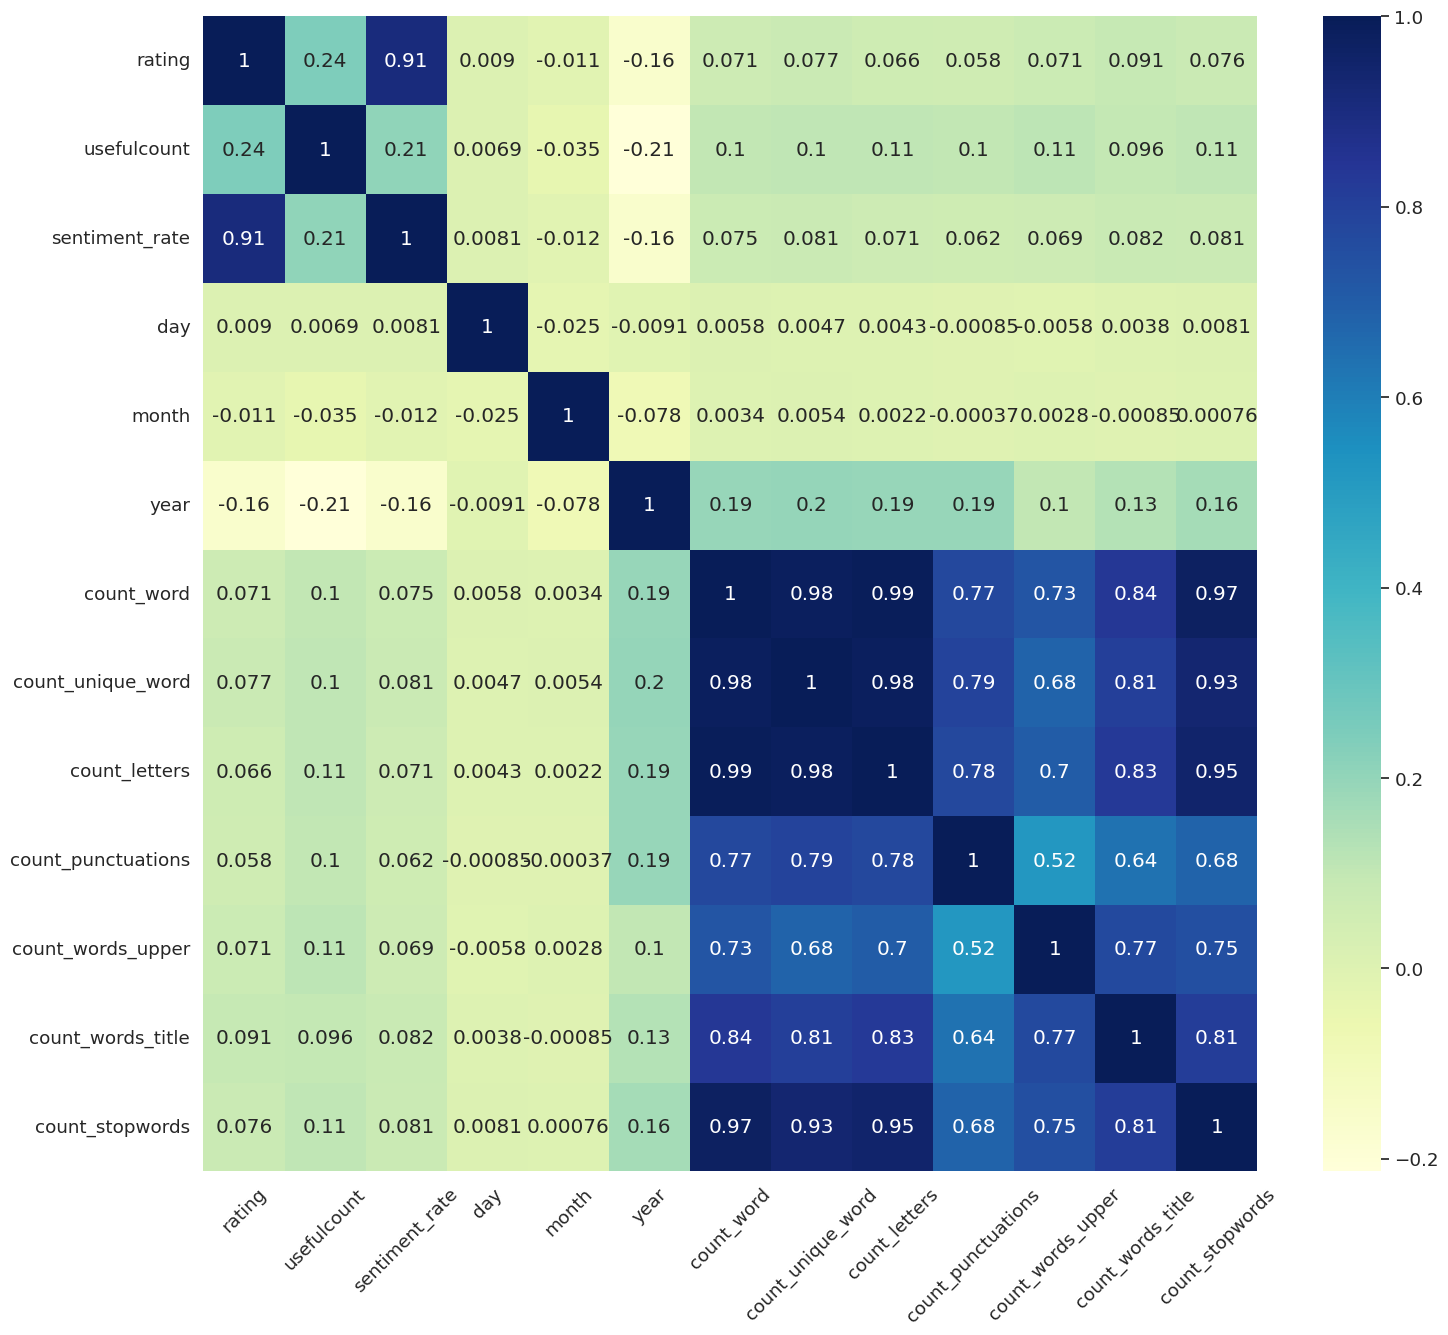

In [91]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);

# Data frame analysis for model

In [93]:
sorted_df = df_data.sort_values(by=['condition', 'drugname', 'rating', 'sentiment_clean_ss'])

In [94]:
sorted_df.head(2)

drugname   condition  \
68211   Abilify  Depression   
142645  Abilify  Depression   

                                                   review  rating       date  \
68211   "Bad side effects. I had bad sweating, muscle ...       1 2012-07-28   
142645  "I&#039;m not sure if Abilify worked or not. I...       1 2009-02-08   

        usefulcount  sentiment_rate  \
68211            33               0   
142645           61               0   

                                             review_clean  day  month  ...  \
68211   bad side effect bad sweat muscl stiff nausea w...   28      7  ...   
142645  im sure abilifi work know didnt feel wors 3 we...    8      2  ...   

                                          review_clean_ss  sentiment_clean_ss  \
68211   bad side effects i had bad sweating muscle sti...             -0.7000   
142645  im not sure if abilify worked or not i know i ...             -0.5125   

        count_word count_unique_word  count_letters  count_punctuations  \
68211           19                16             96                   7   
142645          49                38            241                  12   

        count_words_upper  count_words_title  count_stopwords  mean_word_len  
68211                   2                  3                7       4.105263  
142645                  5                  6               24       3.938776  

[2 rows x 23 columns]

In [95]:
sorted_df = sorted_df.loc[:, [ 'drugname', 'condition', 'review', 'rating', 'date','usefulcount', 'sentiment_rate', 'review_clean','sentiment', 'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss']]

In [96]:
sorted_df.head(2)

drugname   condition  \
68211   Abilify  Depression   
142645  Abilify  Depression   

                                                   review  rating       date  \
68211   "Bad side effects. I had bad sweating, muscle ...       1 2012-07-28   
142645  "I&#039;m not sure if Abilify worked or not. I...       1 2009-02-08   

        usefulcount  sentiment_rate  \
68211            33               0   
142645           61               0   

                                             review_clean  sentiment  \
68211   bad side effect bad sweat muscl stiff nausea w...    -0.7000   
142645  im sure abilifi work know didnt feel wors 3 we...    -0.5125   

        sentiment_clean                                    review_clean_ss  \
68211         -0.538095  bad side effects i had bad sweating muscle sti...   
142645         0.500000  im not sure if abilify worked or not i know i ...   

        sentiment_clean_ss  
68211              -0.7000  
142645             -0.5125

In [97]:
sorted_df['condition'].unique()

array(['Depression', 'Diabetes, Type 2', 'High Blood Pressure'],
      dtype=object)

In [98]:
sorted_df.head(2)

drugname   condition  \
68211   Abilify  Depression   
142645  Abilify  Depression   

                                                   review  rating       date  \
68211   "Bad side effects. I had bad sweating, muscle ...       1 2012-07-28   
142645  "I&#039;m not sure if Abilify worked or not. I...       1 2009-02-08   

        usefulcount  sentiment_rate  \
68211            33               0   
142645           61               0   

                                             review_clean  sentiment  \
68211   bad side effect bad sweat muscl stiff nausea w...    -0.7000   
142645  im sure abilifi work know didnt feel wors 3 we...    -0.5125   

        sentiment_clean                                    review_clean_ss  \
68211         -0.538095  bad side effects i had bad sweating muscle sti...   
142645         0.500000  im not sure if abilify worked or not i know i ...   

        sentiment_clean_ss  
68211              -0.7000  
142645             -0.5125

In [99]:
sorted_df['sentiment_scaled'] = sorted_df['sentiment']*5+6

In [100]:
np.corrcoef(sorted_df['sentiment_scaled'], df_data['rating'])

array([[ 1.        , -0.01474924],
       [-0.01474924,  1.        ]])

In [101]:
corr_matrix = sorted_df.corr()
corr_matrix

rating  usefulcount  sentiment_rate  sentiment  \
rating              1.000000     0.243938        0.907395   0.387083   
usefulcount         0.243938     1.000000        0.208446   0.113422   
sentiment_rate      0.907395     0.208446        1.000000   0.339334   
sentiment           0.387083     0.113422        0.339334   1.000000   
sentiment_clean     0.270302     0.055804        0.237149   0.644491   
sentiment_clean_ss  0.385238     0.113621        0.337877   0.989691   
sentiment_scaled    0.387083     0.113422        0.339334   1.000000   

                    sentiment_clean  sentiment_clean_ss  sentiment_scaled  
rating                     0.270302            0.385238          0.387083  
usefulcount                0.055804            0.113621          0.113422  
sentiment_rate             0.237149            0.337877          0.339334  
sentiment                  0.644491            0.989691          1.000000  
sentiment_clean            1.000000            0.648848          0.644491  
sentiment_clean_ss         0.648848            1.000000          0.989691  
sentiment_scaled           0.644491            0.989691          1.000000

In [102]:
sorted_df.head(2)

drugname   condition  \
68211   Abilify  Depression   
142645  Abilify  Depression   

                                                   review  rating       date  \
68211   "Bad side effects. I had bad sweating, muscle ...       1 2012-07-28   
142645  "I&#039;m not sure if Abilify worked or not. I...       1 2009-02-08   

        usefulcount  sentiment_rate  \
68211            33               0   
142645           61               0   

                                             review_clean  sentiment  \
68211   bad side effect bad sweat muscl stiff nausea w...    -0.7000   
142645  im sure abilifi work know didnt feel wors 3 we...    -0.5125   

        sentiment_clean                                    review_clean_ss  \
68211         -0.538095  bad side effects i had bad sweating muscle sti...   
142645         0.500000  im not sure if abilify worked or not i know i ...   

        sentiment_clean_ss  sentiment_scaled  
68211              -0.7000            2.5000  
142645             -0.5125            3.4375

In [103]:
sorted_df['cumilative'] = (sorted_df['rating']+sorted_df['sentiment_scaled'])/2

In [104]:
sorted_df.head(2)

drugname   condition  \
68211   Abilify  Depression   
142645  Abilify  Depression   

                                                   review  rating       date  \
68211   "Bad side effects. I had bad sweating, muscle ...       1 2012-07-28   
142645  "I&#039;m not sure if Abilify worked or not. I...       1 2009-02-08   

        usefulcount  sentiment_rate  \
68211            33               0   
142645           61               0   

                                             review_clean  sentiment  \
68211   bad side effect bad sweat muscl stiff nausea w...    -0.7000   
142645  im sure abilifi work know didnt feel wors 3 we...    -0.5125   

        sentiment_clean                                    review_clean_ss  \
68211         -0.538095  bad side effects i had bad sweating muscle sti...   
142645         0.500000  im not sure if abilify worked or not i know i ...   

        sentiment_clean_ss  sentiment_scaled  cumilative  
68211              -0.7000            2.5000     1.75000  
142645             -0.5125            3.4375     2.21875

In [105]:
avg_rating = sorted_df.groupby(['condition', 'drugname'])['cumilative'].mean()

In [106]:
avg_rating

condition            drugname                        
Depression           Abilify                             6.525283
                     Alprazolam                          8.008011
                     Amitriptyline                       7.579827
                     Amitriptyline / chlordiazepoxide    8.296296
                     Amoxapine                           8.281250
                                                           ...   
High Blood Pressure  Verapamil                           5.897061
                     Verelan PM                          8.550000
                     Zestoretic                          8.260206
                     Zestril                             5.982037
                     Ziac                                6.084385
Name: cumilative, Length: 334, dtype: float64

In [107]:
avg_rating = avg_rating.to_frame()

In [108]:
avg_rating

cumilative
condition           drugname                                    
Depression          Abilify                             6.525283
                    Alprazolam                          8.008011
                    Amitriptyline                       7.579827
                    Amitriptyline / chlordiazepoxide    8.296296
                    Amoxapine                           8.281250
...                                                          ...
High Blood Pressure Verapamil                           5.897061
                    Verelan PM                          8.550000
                    Zestoretic                          8.260206
                    Zestril                             5.982037
                    Ziac                                6.084385

[334 rows x 1 columns]

In [109]:
avg_rating = avg_rating.sort_values(['condition','cumilative','drugname'])

In [110]:
avg_rating

cumilative
condition           drugname                             
Depression          Tryptophan                   3.360085
                    Vyvanse                      4.341270
                    Fetzima                      5.405517
                    Oleptro                      5.412037
                    Strattera                    5.476042
...                                                   ...
High Blood Pressure Verelan PM                   8.550000
                    Caduet                       8.750000
                    Reserpine                    8.896660
                    Fosinopril                   9.042361
                    Amlodipine / atorvastatin    9.500000

[334 rows x 1 columns]

## Exporting dataframe as pkl 

In [111]:
# Export the dataframe to a pickle file
with open('dataframe.pkl', 'wb') as f:
    pd.to_pickle(avg_rating, f)

In [112]:
avg_rating.columns

Index(['cumilative'], dtype='object')

In [113]:
avg_rating.to_csv('final.csv')


In [114]:
df_app = pd.read_csv('final.csv')

In [115]:
df_app

condition                   drugname  cumilative
0             Depression                 Tryptophan    3.360085
1             Depression                    Vyvanse    4.341270
2             Depression                    Fetzima    5.405517
3             Depression                    Oleptro    5.412037
4             Depression                  Strattera    5.476042
..                   ...                        ...         ...
329  High Blood Pressure                 Verelan PM    8.550000
330  High Blood Pressure                     Caduet    8.750000
331  High Blood Pressure                  Reserpine    8.896660
332  High Blood Pressure                 Fosinopril    9.042361
333  High Blood Pressure  Amlodipine / atorvastatin    9.500000

[334 rows x 3 columns]

In [116]:
avg_rating2 = df_app.groupby(['condition', 'drugname','cumilative'])
avg_rating2.head(412).to_csv('final2.csv',index=False)

In [117]:
df_app2 = pd.read_csv('final2.csv')

In [118]:
df_app2

condition                   drugname  cumilative
0             Depression                 Tryptophan    3.360085
1             Depression                    Vyvanse    4.341270
2             Depression                    Fetzima    5.405517
3             Depression                    Oleptro    5.412037
4             Depression                  Strattera    5.476042
..                   ...                        ...         ...
329  High Blood Pressure                 Verelan PM    8.550000
330  High Blood Pressure                     Caduet    8.750000
331  High Blood Pressure                  Reserpine    8.896660
332  High Blood Pressure                 Fosinopril    9.042361
333  High Blood Pressure  Amlodipine / atorvastatin    9.500000

[334 rows x 3 columns]

In [119]:
# Export the dataframe to a pickle file
with open('df_app.pkl', 'wb') as f:
    pd.to_pickle(df_app, f)

In [120]:
# Export the dataframe to a pickle file
with open('df_app2.pkl', 'wb') as f:
    pd.to_pickle(df_app2, f)